## Import Libraries and Data

In [2]:
import pandas as pd
import matplotlib
matplotlib.rcParams["figure.facecolor"] = "white"
import matplotlib.pyplot as plt

import pyentrp
import numpy as np
from FiShPy import FiSh
import os 

In [27]:
import matplotlib as mpl

# Set default figure size
mpl.rcParams['figure.figsize'] = [10, 10]

# Set default font size for labels, title, and legend
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.title_fontsize'] = 15

# Set default size for major tick labels
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17


In [27]:
directory_path = "PM2.5"

In [28]:
result_df = []
for file_name in os.listdir(directory_path):
    if file_name.endswith(".csv"):
        print(file_name)
        # read the CSV file into a dataframe in chunks
        chunks = pd.read_csv(os.path.join(directory_path, file_name), chunksize=10000)
        # initialize an empty list to store dataframes
        df_list = []
        # concatenate all the chunks into a single dataframe
        for chunk in chunks:
            df_list.append(chunk)
        df_tmp = pd.concat(df_list, ignore_index=True)
        result_df.append(df_tmp)

Austria.csv
Belgium.csv
Bosnia.csv
Bulgaria.csv
Cezch_Republica.csv
Croatia.csv
Cypern.csv
Danemark.csv
Estonia.csv
Finland.csv
France.csv


C:\Users\Kelyan\AppData\Local\Temp\ipykernel_19168\2742854007.py:10: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:


Germany.csv
Gibraltar.csv
Grecce.csv
Hungary.csv
Ireland.csv
Island.csv
Italy.csv
Kosovo.csv
Latvia.csv
Lithuania.csv
Luxembourg.csv
Macedonia.csv
Malta.csv
Netherlands.csv
Norway.csv
Poland.csv
Portugal.csv
Romania.csv
Serbia.csv
SLovakia.csv
SLovenia.csv
Spain.csv
Sweden.csv
Switzerland.csv
Turkey.csv
United_Kingdom.csv


In [ ]:
# count numbers of dataframes in the list result_df that have a column named "Datetime"
count = 0
correct_df = []
for i in range(len(result_df)):
    if "Datetime" in result_df[i].columns:
        count += 1
        correct_df.append(i)
print(count)
print(correct_df)

In [33]:
# Transform all "Datetime" coulumn to datetime format in all dataframes in the list result_df and set them as index
for i in range(len(result_df)):
    print(i, "over 37")
    result_df[i]["Datetime"] = pd.to_datetime(result_df[i]["Datetime"], format="%Y-%m-%d %H:%M:%S")
    result_df[i].set_index("Datetime", inplace=True)
    # remove unite column
    result_df[i].drop("unite", axis=1, inplace=True)

0 over 37
1 over 37
2 over 37


KeyboardInterrupt: 

Exception ignored in: 'pandas._libs.tslibs.timezones.is_utc_zoneinfo'
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\zoneinfo\_common.py", line 12, in load_tzdata
    return importlib.resources.open_binary(package_name, resource_name)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\importlib\resources.py", line 43, in open_binary
    package = _common.get_package(package)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\importlib\_common.py", line 66, in get_package
    resolved = resolve(package)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\importlib\_common.py", line 57, in resolve
    return cand if isinstance(cand, types.ModuleType) else importlib.import_module(cand)
  File "C:\Program Files\WindowsApps\P

In [ ]:
# Select the first date that is in all the dataframes, check that this date is the same for all dataframes
first_date = result_df[0].index[0]
for i in range(len(result_df)):
    if result_df[i].index[0] < first_date:
        first_date = result_df[i].index[0]

last_date = result_df[0].index[-1]
for i in range(len(result_df)):
    if result_df[i].index[-1] > last_date:
        last_date = result_df[i].index[-1]
print(first_date)
print(last_date)


In [ ]:
# Define the start and end Datetime index
start_index = pd.Timestamp("2013-01-01 00:00:00+01:00")
end_index = pd.Timestamp("2019-01-01 00:00:00+01:00")

# Create a new index range with hourly frequency
new_index = pd.date_range(start=start_index, end=end_index, freq='H')

# Initialize an empty list to store the processed DataFrames
processed_dfs = []

# Loop through each DataFrame in the result_df list
for df in result_df:
    # Drop duplicate Datetime rows, keeping only the first occurrence
    df = df.loc[~df.index.duplicated(keep='first')]

    # Reindex each DataFrame using the new index, and fill NaN in the columns
    df_reindexed = df.reindex(new_index, fill_value=pd.NA)

    # Remove rows where the Datetime minute is not equal to 0 and the Datetime second is not equal to 0
    df_reindexed = df_reindexed.loc[(df_reindexed.index.minute == 0) & (df_reindexed.index.second == 0)]

    # Append the processed DataFrame to the list
    processed_dfs.append(df_reindexed)

# Concatenate all the processed DataFrames into a single DataFrame
df = pd.concat(processed_dfs, axis=1)

In [ ]:
# percentage of nan values in df
df.isna().sum().sum()/(df.shape[0]*df.shape[1])

In [ ]:
directory_path = "Metadata"

In [ ]:
metadata = pd.DataFrame()
for file_name in os.listdir(directory_path):
    print(file_name)
    if file_name.endswith(".csv"):
        # read the CSV file into a dataframe in chunks
        chunks = pd.read_csv(os.path.join(directory_path, file_name), chunksize=10000, sep=";")
        # initialize an empty list to store dataframes
        df_list = []
        # concatenate all the chunks into a single dataframe
        for chunk in chunks:
            df_list.append(chunk)
        tmp = pd.concat(df_list, ignore_index=True)
        # concatenate metadata with tmp
        metadata = pd.concat([metadata, tmp.T.reset_index()], ignore_index=True)

In [ ]:
# Set first line of metadata as column names
metadata.columns = metadata.iloc[0]

In [ ]:
# remove all rows of metadata where Longitude and Latitude are NaN
metadata = metadata[metadata.Longitude.notna()]

In [ ]:
# Remove rows of metadata where the column "Stations" is "Stations"
metadata = metadata[metadata.Stations != "Stations"]
metadata.shape

In [ ]:
# remove duplicates in metadata
metadata = metadata.loc[~metadata.Stations.duplicated(keep='first')]
metadata.shape

In [ ]:
# rename Stations column of metadata as "Station"
metadata.rename(columns={"Stations": "Station"}, inplace=True)
metadata.shape

In [ ]:
# Replace negative values by NaN in all df
df[df < 0] = pd.NA

In [ ]:
# count number of columns with only nan values in df
df.isna().all(axis=0).sum()

In [ ]:
# remove columns with only nan values in df
df = df.loc[:, df.isna().all(axis=0) == False]
df.isna().all(axis=0).sum()

In [ ]:
# keep only rows in metadata where stations are in the columns of df
metadata = metadata[metadata["Station"].isin(df.columns)]
metadata.shape

In [ ]:
# keep only columns of result_df that are in metadata.Station
df = df[metadata["Station"]]
df.shape

In [ ]:
# save metadata into metadata.csv
metadata.to_csv("metadata_PM25.csv")
df.to_csv("PM25.csv")

In [ ]:
result_df = pd.read_csv("PM25.csv", index_col=0)

In [ ]:
metadata = pd.read_csv("metadata_PM25.csv", index_col=0)

In [ ]:
result_df = result_df.T

In [ ]:
# merge metadata and result_df where Station in metadata is the same as column name in result_df
df = result_df.merge(metadata, left_on=result_df.index, right_on=metadata.Station)
df.head()

In [ ]:
df = df.T
df

In [ ]:
# Put the first row as the header
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

df.head()

In [ ]:
# Set 5 last rows as 5 first rows
df = df.iloc[-5:].append(df.iloc[:-5])
df.head(10)

In [ ]:
# select first row from result_df
first_row = result_df.iloc[0]

In [ ]:
df.reset_index(inplace=True)

In [ ]:
# Put first_row as df index
df["index"][5:] = first_row


In [ ]:
# rename index column to info and
df = df.rename(columns={'index': 'info'})
df.head()

In [ ]:
total_df = df
info_df = df[:4]
time_df = df[6:]
# save the three dataframes in csv files
info_df.to_csv("info_df_PM25.csv", index=False)
time_df.to_csv("time_df_PM25.csv", index=False)
total_df.to_csv("total_df_PM25.csv", index=False)

In [ ]:
df = pd.read_csv("time_df_PM25.csv")

In [ ]:
# Transform Datetime column to datetime format
df['Datetime'] = pd.to_datetime(df['info'])
df.head()

In [ ]:
import matplotlib
matplotlib.rcParams["figure.facecolor"] = "white"

In [ ]:
# Plot mean of each column 
df.mean().plot(kind='bar', figsize=(30,10))

# Set title
plt.title('Mean concentration of NO2 in each europe station')

# Set x label
plt.xlabel('Station')

# Set y label
plt.ylabel('Mean NO2 Concentration')

plt.show()

In [ ]:
df.median().plot(kind='bar', figsize=(30,10))

# Set title
plt.title('Median concentration of NO2 in each european station')

# Set x label
plt.xlabel('Station')

# Set y label
plt.ylabel('Median NO2 Concentration')

plt.show()

In [ ]:
# Plot percentage of NA values in each column
(df.isna().sum()*100/len(df)).plot(kind='bar', figsize=(30,10))

# Set title
plt.title('Percentage of NA values in each european station')

# Set x label
plt.xlabel('Station')


# Set y label
plt.ylabel('Percentage of NA values')

plt.show()


## Data Cleaning

### Select and Clean concentration data

In [ ]:
df = pd.read_csv("PM25.csv", index_col=0)

In [ ]:
df_test = df.loc["2018-01-01":"2018-31-12"]
# Compute average percentage of missing data in df
missing_data_percentage = df_test.isna().mean().mean() * 100
print(f"Average percentage of missing data: {missing_data_percentage:.2f}%")

In [ ]:
df_test = df_test.loc[~df_test.index.duplicated(keep='first')]

In [ ]:
import pandas as pd

# Calculate the percentage of missing data in each column
missing_data_percent = df.isnull().mean() * 100
print("Percentage of missing data in each column:\n", missing_data_percent)

# Remove columns with more than 5% or 10% of missing data
threshold =10
df_test_filtered = df.loc[:, missing_data_percent <= threshold]

# Print the number of columns before and after removing columns with more than 30% missing data
print(f"Number of columns before filtering: {df.shape[1]}")
print(f"Number of columns after filtering: {df_test_filtered.shape[1]}")


In [ ]:
df_interpolated = df_test_filtered.interpolate(method='linear')

In [ ]:
print("Number of missing values after interpolation:", df_interpolated.isnull().sum().sum())

In [ ]:
# Apply forward-fill to fill missing values at the beginning of the time series
df_interpolated_ffill = df_interpolated.fillna(method='ffill')

# Apply backward-fill to fill missing values at the end of the time series
df_interpolated_ffill_bfill = df_interpolated_ffill.fillna(method='bfill')

# Verify that there are no missing values in the final dataframe
print("Number of missing values after forward-fill and backward-fill:", df_interpolated_ffill_bfill.isnull().sum().sum())


In [ ]:
df_interpolated_ffill_bfill.to_csv("PM25_filtered_2017_ 385_stations.csv")

### Construct Serie data

In [ ]:
dfs = pd.read_csv("NO2_2015_filtered.csv")

In [ ]:
dfs = pd.read_csv("PM25_filtered_2017_ 385_stations.csv")

In [ ]:
dfs = dfs.reset_index()

In [ ]:
dfst = dfs.T
dfst.head()

In [ ]:
dfst.reset_index(inplace=True)
dfst.head()

In [ ]:
df2 = pd.read_csv("metadata.csv")

In [ ]:
df2 = pd.read_csv("metadata_PM25.csv")

In [ ]:
# remove column Unnamed: 0	and rename column Station as Stations in df2
df2 = df2.rename(columns={"Station": "Stations"})
df2.head()

In [ ]:
dfsm = pd.merge(dfst, df2, left_on='index', right_on="Stations")
dfsm.head()

In [ ]:
# drop "index", "Unnamed: 0", "Stations" columns
dfsm.drop(["index", "Unnamed: 0", "Stations"], axis=1, inplace=True)
dfsm.head()

In [ ]:
cols = dfsm[["Longitude", "Latitude", "Altitude", "Area"]]

In [ ]:
# Remove cols from dfsm
dfsm.drop(["Longitude", "Latitude", "Altitude", "Area"], axis=1, inplace=True)

In [ ]:
dfsmT = dfsm.T
dfsmT.head()

In [ ]:
# dfsmT.index = dfs.Datetime
# dfsmT.index = df.
dfsmT.index = dfs["index"]

In [ ]:
dfsmT.shape

In [ ]:
subset = dfsmT.melt()

In [ ]:
i = subset.shape[0]/dfs.shape[0]
i

In [ ]:
dfs.rename(columns={"index": "Datetime"}, inplace=True)

In [ ]:
import pandas as pd
import numpy as np

# repeat the column 3 times
repeated_values = np.tile(dfs['Datetime'].values, 385)

# stack the values into a single column
stacked_df = pd.DataFrame({'Index': range(1, len(repeated_values)+1), 'Datetime': repeated_values})


In [ ]:
# create a column "Datetime" in subset which is the index of dfsmT reapeted 54 times but
subset["Datetime"] = stacked_df["Datetime"]
subset.tail()

In [ ]:
subset.shape[0]/cols.shape[0]

In [ ]:
cols = cols[["Longitude", "Latitude"]]

In [ ]:
subset = subset[["Datetime", "value"]]

In [ ]:
# repeat 200 first element of cols 57457 times
repeated_cols = np.repeat(cols.values, 52585, axis=0)

In [ ]:
# Create 4 columns in subset with the values of cols
subset["Longitude"] = repeated_cols[:,0]
subset["Latitude"] = repeated_cols[:,1]
# subset["Altitude"] = repeated_cols[:,2]
# subset["Area"] = repeated_cols[:,3]

In [ ]:
# Drop variable column and set Datetime as index
# subset.drop("variable", axis=1, inplace=True)
subset.set_index("Datetime", inplace=True)
subset.head()

In [ ]:
# Check if there are some missing values in the Datetime index
subset.index.isnull().sum()

In [ ]:
# Save subset to csv
subset.to_csv("serie_data_clean_2017.csv")

### Select and clean Serie Data

In [ ]:
df = pd.read_csv("serie_data_clean_2017.csv")

In [ ]:
df = df[df['Datetime'].str.slice(start=-12, stop=-9) == ':00']

In [ ]:
df = df.drop_duplicates(subset=['Datetime', 'Longitude', 'Latitude'])

In [ ]:
# Group by Longitude and Latitude to create a id column for each station
df['id'] = df.groupby(['Longitude', 'Latitude']).ngroup()

In [ ]:
test = df.groupby('id').count().reset_index()

In [ ]:
df2 = df[df['id'] == 200]

In [ ]:
df2.Datetime = pd.to_datetime(df2.Datetime)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df2
print("Min Datetime:", df2['Datetime'].min())
print("Max Datetime:", df2['Datetime'].max())
print("Number of rows:", len(df2))

# Check if the Datetime column is sorted in ascending order
is_sorted = df2['Datetime'].is_monotonic_increasing
print("Datetime column is sorted in ascending order:", is_sorted)

# Check if there are any duplicates in the Datetime column
is_unique = df2['Datetime'].is_unique
print("Datetime column has no duplicates:", is_unique)

# Check if there are missing values in the Datetime column
has_na = df2['Datetime'].isna().any()
print("Datetime column has no missing values:", not has_na)

# Check if the DataFrame has the expected number of rows and the Datetime column is well ordered
if (pd.Timestamp(df2['Datetime'].min()) == pd.Timestamp('2017-01-01 00:00:00+01:00') and
    pd.Timestamp(df2['Datetime'].max()) == pd.Timestamp('2017-12-30 23:00:00+01:00') and
    len(df2) == 8736 and
    is_sorted):
    print("Datetime column is well ordered and has the correct range.")
else:
    print("Datetime column has issues with ordering or range.")

In [ ]:
# For each of the 3 first ids, put the 168 first rows in a new dataframe
df2 = df[df['id'] == 200].iloc[2020:]
df3 = df[df['id'] == 300].iloc[2020:]
df4 = df[df['id'] == 400].iloc[2020:]

# Concatenate the 3 dataframes
df5 = pd.concat([df2, df3, df4])

In [ ]:
# Create a dataframe df5 which is the 2000 first rows of each station
df5 = df.groupby('id').head(1008)

df5.head()

In [ ]:
df5['Datetime'] = pd.to_datetime(df5['Datetime'], format='%Y-%m-%d %H:%M:%S%z')

In [ ]:
df5.reset_index(drop=True, inplace=True)

In [ ]:
df5.to_csv("sample_data1008.csv")

## Data Exploration

### Spatial means

In [2]:
df = pd.read_csv("NO2.csv")

OR

In [ ]:
df = pd.read_csv("PM25.csv")

In [ ]:
# Compute mean of each column of df
df_mean = df.mean(axis=0)

In [ ]:
df2 = pd.read_csv("metadata.csv")
df2.head()

In [ ]:
# rename Station to Stations in df2
df2 = df2.rename(columns={'Station': 'Stations'})

In [ ]:
# transform df in a dataframe with 2 columns
df_mean = pd.DataFrame({'Stations': df_mean.index, 'Mean': df_mean.values})

In [ ]:
# Merge df and df2 on Stations column of df2 and index of df
df_mean = pd.merge(df2, df_mean)
df_mean.head()

In [ ]:
df_mean.Latitude = df_mean.Latitude.astype(float)
df_mean.Longitude = df_mean.Longitude.astype(float)
df_mean.Mean = df_mean.Mean.astype(float)

In [ ]:
import folium
from folium.features import DivIcon
import pandas as pd
import branca.colormap as cm

data = df_mean.dropna()

europe_map = folium.Map(location=[50.0, 15.0], zoom_start=4, tiles='CartoDB positron')

# Create a linear colormap
min_mean = data['Mean'].min()
max_mean = data['Mean'].max()
colormap = cm.LinearColormap(['blue', 'green', 'yellow', 'red'], vmin=min_mean, vmax=max_mean)

for index, row in data.iterrows():
    # Get the color for the current mean value
    marker_color = colormap(row['Mean'])
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=DivIcon(
            icon_size=(1, 1),
            icon_anchor=(0.5, 0.5),
            html=f'<div style="width: 5px; height: 5px; background-color: {marker_color}; border-radius: 50%;"></div>'
        )
    ).add_to(europe_map)

# Add the colormap legend to the map
colormap.caption = 'Mean NO2 Concentration between 2013 and 2019 expressed in µg/m3'
europe_map.add_child(colormap)

europe_map.save('europe_map_NO2_normal.html')


In [ ]:
import folium
from folium.features import DivIcon
import pandas as pd
import branca.colormap as cm

data = df_mean.dropna()

europe_map = folium.Map(location=[50.0, 15.0], zoom_start=4, tiles='CartoDB positron')

# Create a linear colormap
min_mean = data['Mean'].min()
max_mean = data['Mean'].max()
colormap = cm.linear.viridis.scale(min_mean, max_mean)  # Change colormap to viridis

for index, row in data.iterrows():
    # Get the color for the current mean value
    marker_color = colormap(row['Mean'])
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=DivIcon(
            icon_size=(1, 1),
            icon_anchor=(0.5, 0.5),
            html=f'<div style="width: 5px; height: 5px; background-color: {marker_color}; border-radius: 50%;"></div>'
        )
    ).add_to(europe_map)

# Add the colormap legend to the map
colormap.caption = 'Mean NO2 Concentration between 2013 and 2019 expressed in µg/m3'
europe_map.add_child(colormap)

europe_map.save('europe_map_NO2_viridis.html')


### Year means

In [ ]:
df = pd.read_csv("NO2.csv")

In [ ]:
df = pd.read_csv("PM25.csv")

In [ ]:
df.head()

In [ ]:
# rename Unnamed: 0 to Datetime
df = df.rename(columns={'Unnamed: 0': 'Datetime'})

In [ ]:
# Extract the year from the date column
df['Year'] = df['Datetime'].str[:4]

In [ ]:
# Group by year and compute the mean of each column and ignore nan values
df = df.groupby('Year').mean()

In [ ]:
df2 = pd.read_csv("metadata_PM25.csv")

In [ ]:
year_2013 = df.loc['2013']
year_2014 = df.loc['2014']
year_2015 = df.loc['2015']
year_2016 = df.loc['2016']
year_2017 = df.loc['2017']

In [ ]:
year_2013 = pd.DataFrame({'Stations': year_2013.index, 'Mean': year_2013.values})
year_2014 = pd.DataFrame({'Stations': year_2014.index, 'Mean': year_2014.values})
year_2015 = pd.DataFrame({'Stations': year_2015.index, 'Mean': year_2015.values})
year_2016 = pd.DataFrame({'Stations': year_2016.index, 'Mean': year_2016.values})
year_2017 = pd.DataFrame({'Stations': year_2017.index, 'Mean': year_2017.values})

In [ ]:
# rename Station to Stations in df2
df2 = df2.rename(columns={'Station': 'Stations'})

In [ ]:
year_2013 = pd.merge(year_2013, df2)
year_2014 = pd.merge(year_2014, df2)
year_2015 = pd.merge(year_2015, df2)
year_2016 = pd.merge(year_2016, df2)
year_2017 = pd.merge(year_2017, df2)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create some sample dataframes
years = ['2013', '2014', '2015', '2016', '2017']
dataframes = [year_2013, year_2014, year_2015, year_2016, year_2017]

# create a figure and a set of subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# loop over the subplots and plot a heatmap for each dataframe
for i, ax in enumerate(axs):
    df = dataframes[i]
    ax.scatter(df['Longitude'], df['Latitude'], c=df['Mean'], cmap='hot')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(years[i])
    ax.set_xlim(df['Longitude'].min(), df['Longitude'].max())
    ax.set_ylim(df['Latitude'].min(), df['Latitude'].max())
    ax.grid(True)

# add a colorbar to the last subplot
fig.colorbar(axs[-1].collections[0], ax=axs.ravel().tolist())

# adjust the layout and padding
plt.tight_layout(pad=3.0)

# show the plot
plt.show()


### Hovmoler Plot Latitude and Longitude NO2

In [209]:
df = pd.read_csv("NO2.csv")

In [210]:
# Transform Datetime column to datetime
df["Datetime"] = pd.to_datetime(df["Datetime"], errors='coerce')

In [211]:
# Extract the year from Datetime column
df["Year"] = df["Datetime"].dt.year

In [212]:
df["Month"] = df["Datetime"].dt.month

In [213]:
# Group by year and compute the mean of each year
dfym = df.groupby(["Year", "Month"]).mean()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2422263877.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfym = df.groupby(["Year", "Month"]).mean()


In [214]:
# dfs = dfym.sample(500, axis=1)
dfs = dfym

In [215]:
dfs_T = dfs.T

In [216]:
# Transform dfs_T to a dataframe
dfs_T = pd.DataFrame(dfs_T)

In [217]:
dfs_T.reset_index(inplace=True)

In [218]:
df2 = pd.read_csv("metadata_NO2.csv")

In [219]:
dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2145525468.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")


In [220]:
# Transform Longitude and Latitude columns to numeric
dfm["Longitude"] = pd.to_numeric(dfm["Longitude"], errors='coerce')
dfm["Latitude"] = pd.to_numeric(dfm["Latitude"], errors='coerce')

In [221]:
# Create cl¡olumn "Longitude_" that is the approximation of Longitude the th 5 integers closer
i = 2
dfm["Longitude_app"] = round(dfm["Longitude"]/i, 0)*i
dfm["Latitude_app"] = round(dfm["Latitude"]/i, 0)*i

In [222]:
# Group by Longitude_app and compute the mean of each group
dfm = dfm.groupby("Latitude_app").mean()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\3594569031.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm = dfm.groupby("Latitude_app").mean()


In [223]:
dfm.reset_index(inplace=True)

In [224]:
# drop columns Unnamed: 0, Longitude, Latitude, Longitude_app
dfm = dfm.drop(columns=["Altitude", "Longitude", "Latitude"])

In [225]:
# Transform column format from (2013, 1) to 2013-01
dfm.columns = dfm.columns.map(lambda x: str(x[0]) + "-" + str(x[1]).zfill(2) if type(x) is tuple else x)

In [226]:
# remove last column of dfm
dfm = dfm.iloc[:, :-1]

In [227]:
dfm = dfm.loc[:, ~dfm.columns.str.contains('2019')]

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\3238743735.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(subset.pivot('Year', 'Latitude_app', 'Value'), cmap='viridis',


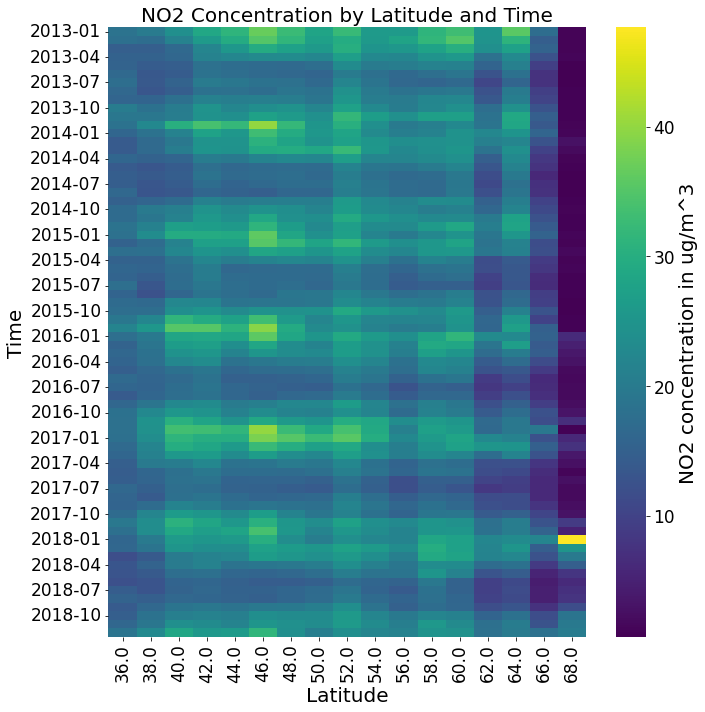

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots()

# Subset the relevant columns of the dataframe
subset = dfm

# Reshape the dataframe so that each year is a separate column
subset = subset.melt(id_vars='Latitude_app', var_name='Year', value_name='Value')

# Remove rows of subset with negative values in the Value column
subset = subset[(subset['Latitude_app'] >= 36) & (subset['Latitude_app'] <= 68)]
# subset = subset[subset["Value"] < 70]

subset = subset[subset['Value'] >= 0]
vmin = subset['Value'].min()
vmax = subset['Value'].max()
center = (vmax + vmin) / 2


# Create the heatmap
sns.heatmap(subset.pivot('Year', 'Latitude_app', 'Value'), cmap='viridis', 
            vmin=vmin, vmax=vmax, center=center, ax=ax, cbar_kws={'label': 'NO2 concentration in ug/m^3'})

# Set the axis labels and plot title
ax.set_xlabel('Latitude')
ax.set_ylabel('Time')
ax.set_title('NO2 Concentration by Latitude and Time')

# Increase the size of the tick labels
ax.tick_params(axis='both', which='major')

plt.tight_layout()

# save the plot
plt.savefig('images/Hovmoller_NO2_latitude_and_time.png', dpi=300, facecolor = "white")

# Show the plot
plt.show()


In [229]:
dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2145525468.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")


In [230]:
# Transform Longitude and Latitude columns to numeric
dfm["Longitude"] = pd.to_numeric(dfm["Longitude"], errors='coerce')
dfm["Latitude"] = pd.to_numeric(dfm["Latitude"], errors='coerce')

In [231]:
# Create cl¡olumn "Longitude_" that is the approximation of Longitude the th 5 integers closer
i = 2
dfm["Longitude_app"] = round(dfm["Longitude"]/i, 0)*i
dfm["Latitude_app"] = round(dfm["Latitude"]/i, 0)*i

In [232]:
dfm = dfm.groupby("Longitude_app").mean()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4151524461.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm = dfm.groupby("Longitude_app").mean()


In [233]:
dfm.reset_index(inplace=True)

In [234]:
# drop columns Unnamed: 0, Longitude, Latitude, Longitude_app
dfm = dfm.drop(columns=["Altitude", "Longitude", "Latitude"])

In [235]:
# Transform column format from (2013, 1) to 2013-01
dfm.columns = dfm.columns.map(lambda x: str(x[0]) + "-" + str(x[1]).zfill(2) if type(x) is tuple else x)

In [236]:
# remove last column of dfm
dfm = dfm.iloc[:, :-1]

In [237]:
# remove columns of dfm with "2019" in the name
dfm = dfm.loc[:, ~dfm.columns.str.contains('2019')]

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\3608873110.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(subset.pivot('Year', 'Longitude_app', 'Value'), cmap='viridis',


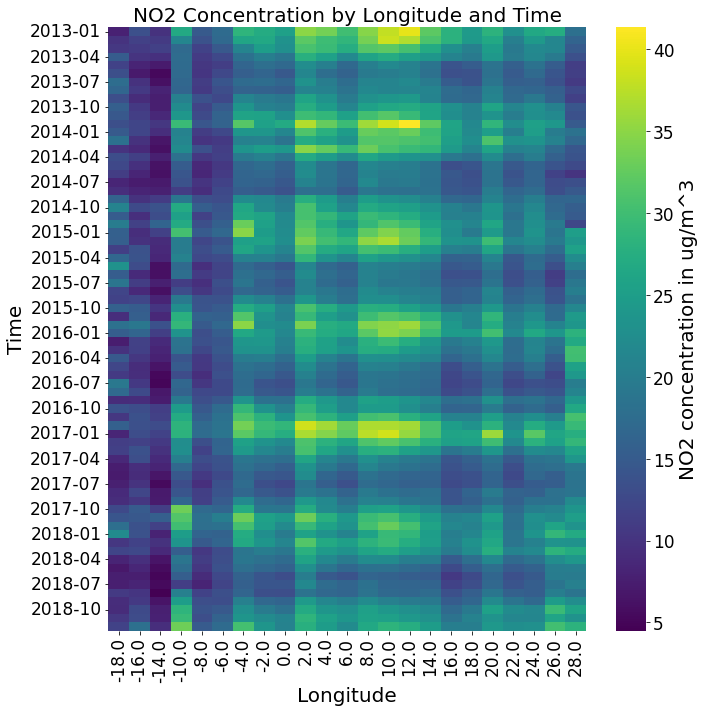

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots()

# Subset the relevant columns of the dataframe
subset = dfm

# Reshape the dataframe so that each year is a separate column
subset = subset.melt(id_vars='Longitude_app', var_name='Year', value_name='Value')

# Remove rows of subset with negative values in the Value column
# subset = subset[subset["Value"] < 60]
subset = subset[(subset['Longitude_app'] >= -20) & (subset['Longitude_app'] <= 28)]


subset = subset[subset['Value'] >= 0]
vmin = subset['Value'].min()
vmax = subset['Value'].max()
center = (vmax + vmin) / 2

# select rows of subset with Latitude_app between -20 and 35

# Create the heatmap
sns.heatmap(subset.pivot('Year', 'Longitude_app', 'Value'), cmap='viridis', 
            vmin=vmin, vmax=vmax, center=center, ax=ax, cbar_kws={'label': 'NO2 concentration in ug/m^3'})

# Set the axis labels and plot title
ax.set_xlabel('Longitude')
ax.set_ylabel('Time')
ax.set_title('NO2 Concentration by Longitude and Time')

# Increase the size of the tick labels
ax.tick_params(axis='both', which='major')

plt.tight_layout()

# save the plot
plt.savefig('images/Hovmoller_NO2_longitude_and_time.png', dpi=300, facecolor = "white")

# Show the plot
plt.show()

### Hovmoller plot missing data NO2

In [239]:
# Get the list of column names excluding 'Datetime', 'Year', and 'Month'
station_columns = [col for col in df.columns if col not in ['Datetime', 'Year', 'Month']]

# Calculate the total number of missing values per group
missing_values = df.groupby(['Year', 'Month'])[station_columns].apply(lambda x: x.isna().sum()).reset_index()

# Calculate the total number of values per group (including NaNs)
total_values = df.groupby(['Year', 'Month'])[station_columns].apply(lambda x: x.count() + x.isna().sum()).reset_index()

# Merge missing_values and total_values DataFrames
merged = pd.merge(missing_values, total_values, on=['Year', 'Month'], suffixes=('_missing', '_total'))

# Compute the percentage of missing values per group
for col in station_columns:
    merged[col] = (merged[f'{col}_missing'] / merged[f'{col}_total']) * 100

# Drop the unnecessary columns
percentage_missing_values = merged.drop([f'{col}_missing' for col in station_columns] + [f'{col}_total' for col in station_columns], axis=1)


C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4181659912.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged[col] = (merged[f'{col}_missing'] / merged[f'{col}_total']) * 100
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4181659912.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged[col] = (merged[f'{col}_missing'] / merged[f'{col}_total']) * 100
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4181659912.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

In [240]:
# dfs = dfym.sample(500, axis=1)
dfs = percentage_missing_values

In [241]:
# group by year and month
dfs = dfs.groupby(["Year", "Month"]).mean()

In [242]:
dfs_T = dfs.T

In [243]:
# Transform dfs_T to a dataframe
dfs_T = pd.DataFrame(dfs_T)

In [244]:
dfs_T.reset_index(inplace=True)

In [245]:
df2 = pd.read_csv("metadata_NO2.csv")

In [246]:
dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2145525468.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")


In [247]:
# Transform Longitude and Latitude columns to numeric
dfm["Longitude"] = pd.to_numeric(dfm["Longitude"], errors='coerce')
dfm["Latitude"] = pd.to_numeric(dfm["Latitude"], errors='coerce')

In [248]:
# Create cl¡olumn "Longitude_" that is the approximation of Longitude the th 5 integers closer
i = 2
dfm["Latitude_app"] = round(dfm["Latitude"]/i, 0)*i

In [249]:
# Group by Longitude_app and compute the mean of each group
dfm = dfm.groupby("Latitude_app").mean()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\3594569031.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm = dfm.groupby("Latitude_app").mean()


In [250]:
dfm.reset_index(inplace=True)

In [251]:
# drop columns Unnamed: 0, Longitude, Latitude, Longitude_app
dfm = dfm.drop(columns=["Altitude", "Longitude", "Latitude"])

In [252]:
# Transform column format from (2013, 1) to 2013-01
dfm.columns = dfm.columns.map(lambda x: str(x[0]) + "-" + str(x[1]).zfill(2) if type(x) is tuple else x)

In [253]:
dfm.drop(columns=["2019-01"], inplace=True)

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\3184472826.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(subset.pivot('Year', 'Latitude_app', 'Value'), cmap='viridis',


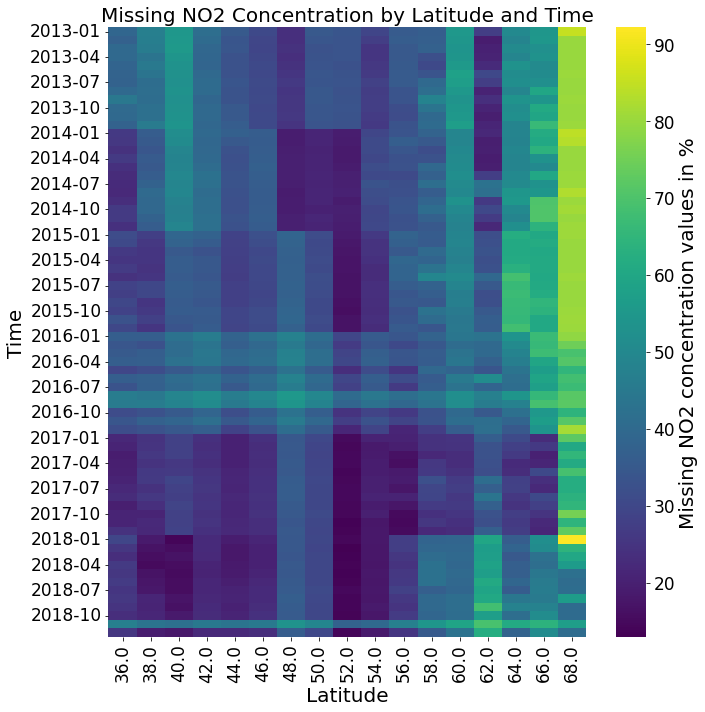

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots()

# Subset the relevant columns of the dataframe
subset = dfm

# Reshape the dataframe so that each year is a separate column
subset = subset.melt(id_vars='Latitude_app', var_name='Year', value_name='Value')

# Remove rows of subset with negative values in the Value column
subset = subset[(subset['Latitude_app'] >= 36) & (subset['Latitude_app'] <= 68)]
# subset = subset[subset["Value"] < 70]

subset = subset[subset['Value'] >= 0]
vmin = subset['Value'].min()
vmax = subset['Value'].max()
center = (vmax + vmin) / 2


# Create the heatmap
sns.heatmap(subset.pivot('Year', 'Latitude_app', 'Value'), cmap='viridis', 
            vmin=vmin, vmax=vmax, center=center, ax=ax, cbar_kws={'label': 'Missing NO2 concentration values in %'})

# Set the axis labels and plot title
ax.set_xlabel('Latitude')
ax.set_ylabel('Time')
ax.set_title('Missing NO2 Concentration by Latitude and Time')

# Increase the size of the tick labels
ax.tick_params(axis='both', which='major')

plt.tight_layout()

# save the plot
plt.savefig('images/Hovmoller_NO2_latitude_and_time_missing.png', dpi=300, facecolor = "white")

# Show the plot
plt.show()


In [255]:
dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2145525468.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")


In [256]:
# Transform Longitude and Latitude columns to numeric
dfm["Longitude"] = pd.to_numeric(dfm["Longitude"], errors='coerce')
dfm["Latitude"] = pd.to_numeric(dfm["Latitude"], errors='coerce')

In [257]:
# Create cl¡olumn "Longitude_" that is the approximation of Longitude the th 5 integers closer
i = 2
dfm["Longitude_app"] = round(dfm["Longitude"]/i, 0)*i

In [258]:
# Group by Longitude_app and compute the mean of each group
dfm = dfm.groupby("Longitude_app").mean()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\175069207.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm = dfm.groupby("Longitude_app").mean()


In [259]:
dfm.reset_index(inplace=True)

In [260]:
# drop columns Unnamed: 0, Longitude, Latitude, Longitude_app
dfm = dfm.drop(columns=["Altitude", "Longitude", "Latitude"])

In [261]:
# Transform column format from (2013, 1) to 2013-01
dfm.columns = dfm.columns.map(lambda x: str(x[0]) + "-" + str(x[1]).zfill(2) if type(x) is tuple else x)

In [262]:
dfm.drop(columns=["2019-01"], inplace=True)

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\3158920735.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(subset.pivot('Year', 'Longitude_app', 'Value'), cmap='viridis',


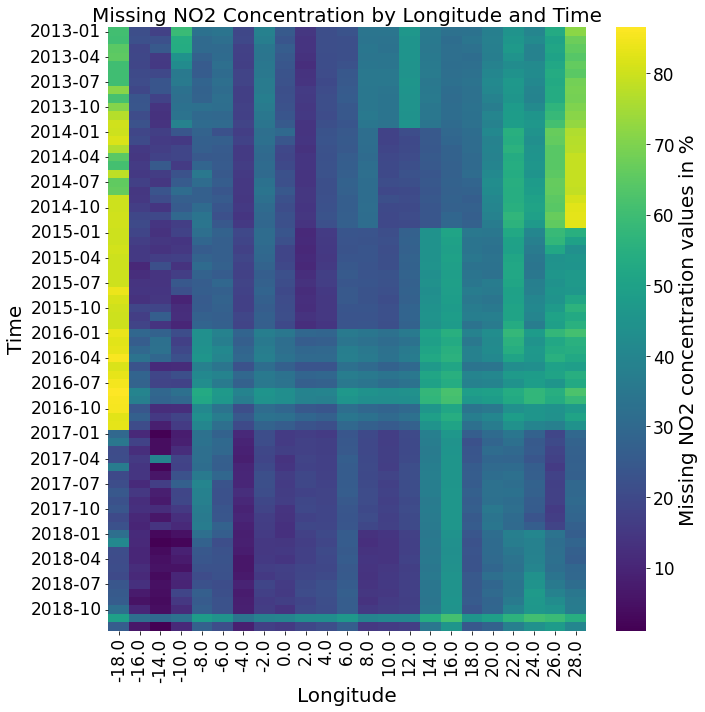

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots()

# Subset the relevant columns of the dataframe
subset = dfm

# Reshape the dataframe so that each year is a separate column
subset = subset.melt(id_vars='Longitude_app', var_name='Year', value_name='Value')

# Remove rows of subset with negative values in the Value column
# subset = subset[subset["Value"] < 60]
subset = subset[(subset['Longitude_app'] >= -20) & (subset['Longitude_app'] <= 28)]


subset = subset[subset['Value'] >= 0]
vmin = subset['Value'].min()
vmax = subset['Value'].max()
center = (vmax + vmin) / 2

# select rows of subset with Latitude_app between -20 and 35

# Create the heatmap
sns.heatmap(subset.pivot('Year', 'Longitude_app', 'Value'), cmap='viridis', 
            vmin=vmin, vmax=vmax, center=center, ax=ax, cbar_kws={'label': 'Missing NO2 concentration values in %'})

# Set the axis labels and plot title
ax.set_xlabel('Longitude')
ax.set_ylabel('Time')
ax.set_title('Missing NO2 Concentration by Longitude and Time')

# Increase the size of the tick labels
ax.tick_params(axis='both', which='major')

plt.tight_layout()

# save the plot
plt.savefig('images/Hovmoller_NO2_longitude_and_time_missing.png', dpi=300, facecolor = "white")

# Show the plot
plt.show()

### Hovmoler Plot Latitude and Longitude PM25

In [326]:
df = pd.read_csv("PM25.csv")

In [327]:
#rename column "Unnamed: 0" to "Datetime"
df.rename(columns={"Unnamed: 0": "Datetime"}, inplace=True)

In [328]:
# Transform Datetime column to datetime
df["Datetime"] = pd.to_datetime(df["Datetime"], errors='coerce')

In [329]:
# Extract the year from Datetime column
df["Year"] = df["Datetime"].dt.year

In [330]:
df["Month"] = df["Datetime"].dt.month

In [331]:
# Group by year and compute the mean of each year
dfym = df.groupby(["Year", "Month"]).mean()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2422263877.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfym = df.groupby(["Year", "Month"]).mean()


In [332]:
# dfs = dfym.sample(500, axis=1)
dfs = dfym

In [333]:
dfs_T = dfs.T

In [334]:
# Transform dfs_T to a dataframe
dfs_T = pd.DataFrame(dfs_T)

In [335]:
dfs_T.reset_index(inplace=True)

In [336]:
df2 = pd.read_csv("metadata_PM25.csv")

In [337]:
dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2145525468.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")


In [338]:
# Transform Longitude and Latitude columns to numeric
dfm["Longitude"] = pd.to_numeric(dfm["Longitude"], errors='coerce')
dfm["Latitude"] = pd.to_numeric(dfm["Latitude"], errors='coerce')

In [339]:
# Create cl¡olumn "Longitude_" that is the approximation of Longitude the th 5 integers closer
i = 2
dfm["Longitude_app"] = round(dfm["Longitude"]/i, 0)*i
dfm["Latitude_app"] = round(dfm["Latitude"]/i, 0)*i

In [340]:
# Group by Longitude_app and compute the mean of each group
dfm = dfm.groupby("Latitude_app").mean()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\3594569031.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm = dfm.groupby("Latitude_app").mean()


In [341]:
dfm.reset_index(inplace=True)

In [342]:
# drop columns Unnamed: 0, Longitude, Latitude, Longitude_app
dfm = dfm.drop(columns=["Altitude", "Longitude", "Latitude"])

In [343]:
# Transform column format from (2013, 1) to 2013-01
dfm.columns = dfm.columns.map(lambda x: str(x[0]) + "-" + str(x[1]).zfill(2) if type(x) is tuple else x)

In [344]:
# remove last column of dfm
dfm = dfm.iloc[:, :-1]

In [345]:
dfm = dfm.loc[:, ~dfm.columns.str.contains('2019')]

In [346]:
# remove column "Unnamed: 0"
dfm = dfm.drop(columns=["Unnamed: 0"])

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2226519200.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(subset.pivot('Year', 'Latitude_app', 'Value'), cmap='viridis',


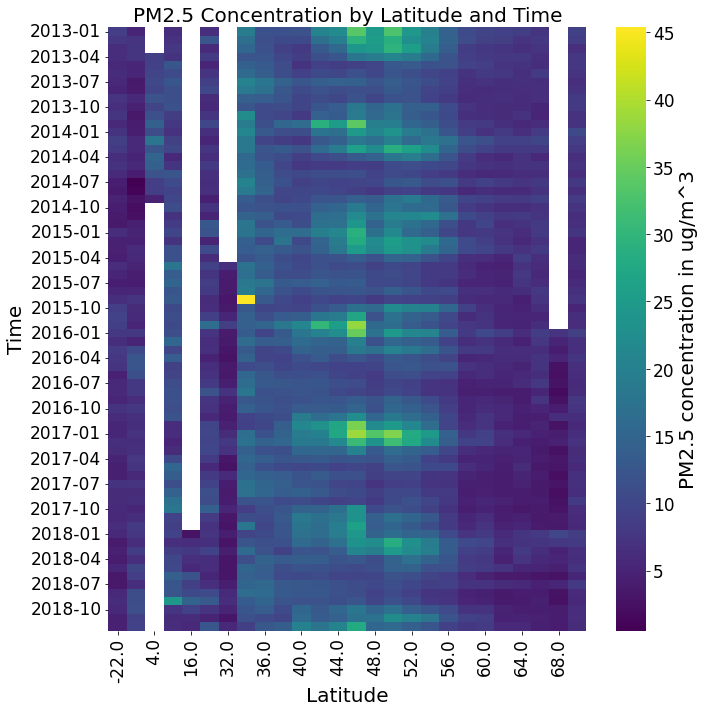

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots()

# Subset the relevant columns of the dataframe
subset = dfm

# Reshape the dataframe so that each year is a separate column
subset = subset.melt(id_vars='Latitude_app', var_name='Year', value_name='Value')

# Remove rows of subset with negative values in the Value column
# subset = subset[(subset['Latitude_app'] >= 36) & (subset['Latitude_app'] <= 68)]
# subset = subset[subset["Value"] < 70]

subset = subset[subset['Value'] < 1000]
vmin = subset['Value'].min()
vmax = subset['Value'].max()
center = (vmax + vmin) / 2


# Create the heatmap
sns.heatmap(subset.pivot('Year', 'Latitude_app', 'Value'), cmap='viridis', 
            vmin=vmin, vmax=vmax, center=center, ax=ax, cbar_kws={'label': 'PM2.5 concentration in ug/m^3'})

# Set the axis labels and plot title
ax.set_xlabel('Latitude')
ax.set_ylabel('Time')
ax.set_title('PM2.5 Concentration by Latitude and Time')

# Increase the size of the tick labels
ax.tick_params(axis='both', which='major')

plt.tight_layout()

# save the plot
plt.savefig('images/Hovmoller_PM25_latitude_and_time.png', dpi=300, facecolor = "white")

# Show the plot
plt.show()

In [351]:
dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2145525468.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")


In [352]:
# Transform Longitude and Latitude columns to numeric
dfm["Longitude"] = pd.to_numeric(dfm["Longitude"], errors='coerce')
dfm["Latitude"] = pd.to_numeric(dfm["Latitude"], errors='coerce')

In [353]:
# Create cl¡olumn "Longitude_" that is the approximation of Longitude the th 5 integers closer
i = 2
dfm["Longitude_app"] = round(dfm["Longitude"]/i, 0)*i
dfm["Latitude_app"] = round(dfm["Latitude"]/i, 0)*i

In [354]:
dfm = dfm.groupby("Longitude_app").mean()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4151524461.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm = dfm.groupby("Longitude_app").mean()


In [355]:
dfm.reset_index(inplace=True)

In [356]:
# drop columns Unnamed: 0, Longitude, Latitude, Longitude_app
dfm = dfm.drop(columns=["Altitude", "Longitude", "Latitude"])

In [357]:
# Transform column format from (2013, 1) to 2013-01
dfm.columns = dfm.columns.map(lambda x: str(x[0]) + "-" + str(x[1]).zfill(2) if type(x) is tuple else x)

In [358]:
# remove last column of dfm
dfm = dfm.iloc[:, :-1]

In [359]:
# remove columns of dfm with "2019" in the name
dfm = dfm.loc[:, ~dfm.columns.str.contains('2019')]

In [361]:
dfm = dfm.drop(columns=["Unnamed: 0"])

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2599514950.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(subset.pivot('Year', 'Longitude_app', 'Value'), cmap='viridis',


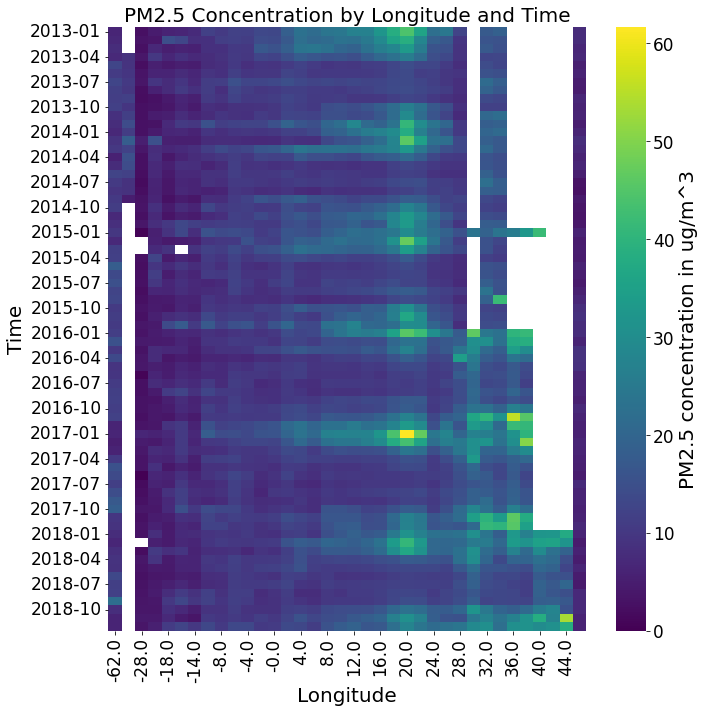

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots()

# Subset the relevant columns of the dataframe
subset = dfm

# Reshape the dataframe so that each year is a separate column
subset = subset.melt(id_vars='Longitude_app', var_name='Year', value_name='Value')

# Remove rows of subset with negative values in the Value column
subset = subset[subset["Value"] < 120]
# subset = subset[(subset['Longitude_app'] >= -20) & (subset['Longitude_app'] <= 28)]


subset = subset[subset['Value'] >= 0]
vmin = subset['Value'].min()
vmax = subset['Value'].max()
center = (vmax + vmin) / 2

# select rows of subset with Latitude_app between -20 and 35

# Create the heatmap
sns.heatmap(subset.pivot('Year', 'Longitude_app', 'Value'), cmap='viridis', 
            vmin=vmin, vmax=vmax, center=center, ax=ax, cbar_kws={'label': 'PM2.5 concentration in ug/m^3'})

# Set the axis labels and plot title
ax.set_xlabel('Longitude')
ax.set_ylabel('Time')
ax.set_title('PM2.5 Concentration by Longitude and Time')

# Increase the size of the tick labels
ax.tick_params(axis='both', which='major')

plt.tight_layout()

# save the plot
plt.savefig('images/Hovmoller_PM25_longitude_and_time.png', dpi=300, facecolor = "white")

# Show the plot
plt.show()

### Hovmoller plot missing data PM25

In [364]:
# Get the list of column names excluding 'Datetime', 'Year', and 'Month'
station_columns = [col for col in df.columns if col not in ['Datetime', 'Year', 'Month']]

# Calculate the total number of missing values per group
missing_values = df.groupby(['Year', 'Month'])[station_columns].apply(lambda x: x.isna().sum()).reset_index()

# Calculate the total number of values per group (including NaNs)
total_values = df.groupby(['Year', 'Month'])[station_columns].apply(lambda x: x.count() + x.isna().sum()).reset_index()

# Merge missing_values and total_values DataFrames
merged = pd.merge(missing_values, total_values, on=['Year', 'Month'], suffixes=('_missing', '_total'))

# Compute the percentage of missing values per group
for col in station_columns:
    merged[col] = (merged[f'{col}_missing'] / merged[f'{col}_total']) * 100

# Drop the unnecessary columns
percentage_missing_values = merged.drop([f'{col}_missing' for col in station_columns] + [f'{col}_total' for col in station_columns], axis=1)


C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4181659912.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged[col] = (merged[f'{col}_missing'] / merged[f'{col}_total']) * 100
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4181659912.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged[col] = (merged[f'{col}_missing'] / merged[f'{col}_total']) * 100
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4181659912.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

In [365]:
# dfs = dfym.sample(500, axis=1)
dfs = percentage_missing_values

In [366]:
# group by year and month
dfs = dfs.groupby(["Year", "Month"]).mean()

In [367]:
dfs_T = dfs.T

In [368]:
# Transform dfs_T to a dataframe
dfs_T = pd.DataFrame(dfs_T)

In [369]:
dfs_T.reset_index(inplace=True)

In [370]:
df2 = pd.read_csv("metadata_PM25.csv")

In [371]:
dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2145525468.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")


In [372]:
# Transform Longitude and Latitude columns to numeric
dfm["Longitude"] = pd.to_numeric(dfm["Longitude"], errors='coerce')
dfm["Latitude"] = pd.to_numeric(dfm["Latitude"], errors='coerce')

In [373]:
# Create cl¡olumn "Longitude_" that is the approximation of Longitude the th 5 integers closer
i = 2
dfm["Latitude_app"] = round(dfm["Latitude"]/i, 0)*i

In [374]:
# Group by Longitude_app and compute the mean of each group
dfm = dfm.groupby("Latitude_app").mean()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\3594569031.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm = dfm.groupby("Latitude_app").mean()


In [375]:
dfm.reset_index(inplace=True)

In [376]:
# drop columns Unnamed: 0, Longitude, Latitude, Longitude_app
dfm = dfm.drop(columns=["Altitude", "Longitude", "Latitude"])

In [377]:
# Transform column format from (2013, 1) to 2013-01
dfm.columns = dfm.columns.map(lambda x: str(x[0]) + "-" + str(x[1]).zfill(2) if type(x) is tuple else x)

In [378]:
dfm.drop(columns=["2019-01"], inplace=True)

In [379]:
dfm = dfm.drop(columns=["Unnamed: 0"])

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\3637996839.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(subset.pivot('Year', 'Latitude_app', 'Value'), cmap='viridis',


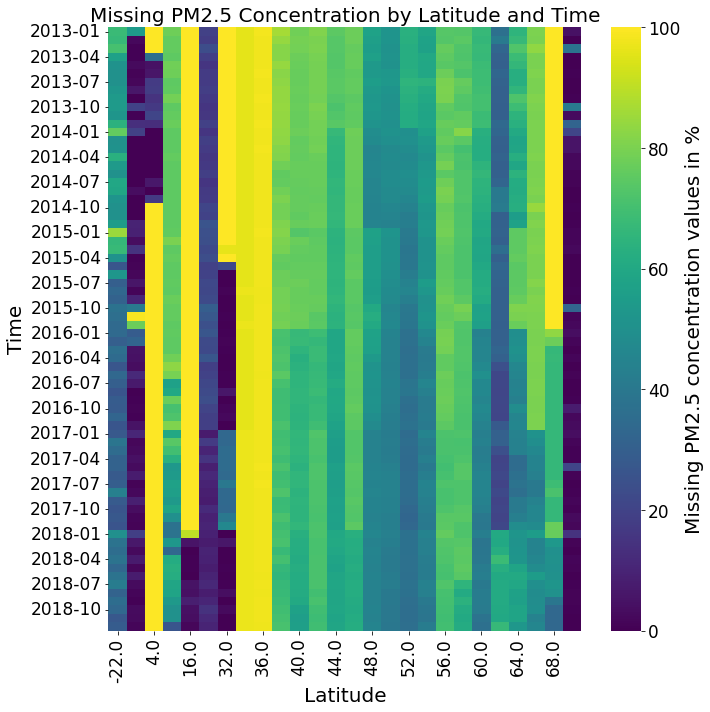

In [380]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots()

# Subset the relevant columns of the dataframe
subset = dfm

# Reshape the dataframe so that each year is a separate column
subset = subset.melt(id_vars='Latitude_app', var_name='Year', value_name='Value')

# Remove rows of subset with negative values in the Value column
# subset = subset[(subset['Latitude_app'] >= 36) & (subset['Latitude_app'] <= 68)]
# subset = subset[subset["Value"] < 70]

subset = subset[subset['Value'] >= 0]
vmin = subset['Value'].min()
vmax = subset['Value'].max()
center = (vmax + vmin) / 2


# Create the heatmap
sns.heatmap(subset.pivot('Year', 'Latitude_app', 'Value'), cmap='viridis', 
            vmin=vmin, vmax=vmax, center=center, ax=ax, cbar_kws={'label': 'Missing PM2.5 concentration values in %'})

# Set the axis labels and plot title
ax.set_xlabel('Latitude')
ax.set_ylabel('Time')
ax.set_title('Missing PM2.5 Concentration by Latitude and Time')

# Increase the size of the tick labels
ax.tick_params(axis='both', which='major')

plt.tight_layout()

# save the plot
plt.savefig('images/Hovmoller_PM25_latitude_and_time_missing.png', dpi=300, facecolor = "white")

# Show the plot
plt.show()


In [381]:
dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2145525468.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfm = pd.merge(df2, dfs_T, left_on='Stations', right_on="index")


In [382]:
# Transform Longitude and Latitude columns to numeric
dfm["Longitude"] = pd.to_numeric(dfm["Longitude"], errors='coerce')
dfm["Latitude"] = pd.to_numeric(dfm["Latitude"], errors='coerce')

In [383]:
# Create cl¡olumn "Longitude_" that is the approximation of Longitude the th 5 integers closer
i = 2
dfm["Longitude_app"] = round(dfm["Longitude"]/i, 0)*i

In [384]:
# Group by Longitude_app and compute the mean of each group
dfm = dfm.groupby("Longitude_app").mean()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\175069207.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm = dfm.groupby("Longitude_app").mean()


In [385]:
dfm.reset_index(inplace=True)

In [386]:
# drop columns Unnamed: 0, Longitude, Latitude, Longitude_app
dfm = dfm.drop(columns=["Altitude", "Longitude", "Latitude"])

In [387]:
# Transform column format from (2013, 1) to 2013-01
dfm.columns = dfm.columns.map(lambda x: str(x[0]) + "-" + str(x[1]).zfill(2) if type(x) is tuple else x)

In [388]:
dfm.drop(columns=["2019-01"], inplace=True)

In [389]:
dfm = dfm.drop(columns=["Unnamed: 0"])

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2942616316.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(subset.pivot('Year', 'Longitude_app', 'Value'), cmap='viridis',


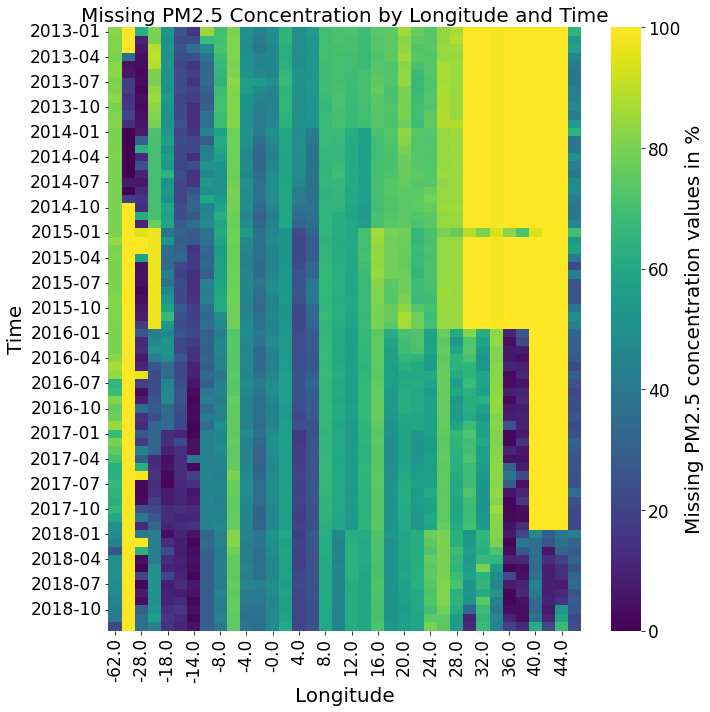

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots()

# Subset the relevant columns of the dataframe
subset = dfm

# Reshape the dataframe so that each year is a separate column
subset = subset.melt(id_vars='Longitude_app', var_name='Year', value_name='Value')

# Remove rows of subset with negative values in the Value column
# subset = subset[subset["Value"] < 60]
# subset = subset[(subset['Longitude_app'] >= -20) & (subset['Longitude_app'] <= 28)]


subset = subset[subset['Value'] >= 0]
vmin = subset['Value'].min()
vmax = subset['Value'].max()
center = (vmax + vmin) / 2

# select rows of subset with Latitude_app between -20 and 35

# Create the heatmap
sns.heatmap(subset.pivot('Year', 'Longitude_app', 'Value'), cmap='viridis', 
            vmin=vmin, vmax=vmax, center=center, ax=ax, cbar_kws={'label': 'Missing PM2.5 concentration values in %'})

# Set the axis labels and plot title
ax.set_xlabel('Longitude')
ax.set_ylabel('Time')
ax.set_title('Missing PM2.5 Concentration by Longitude and Time')

# Increase the size of the tick labels
ax.tick_params(axis='both', which='major')

plt.tight_layout()

# save the plot
plt.savefig('images/Hovmoller_PM25_longitude_and_time_missing.png', dpi=300, facecolor = "white")

# Show the plot
plt.show()

### FIM SEP Computation

In [ ]:
df = pd.read_csv("NO2.csv")

In [ ]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [ ]:
df = df[(df["Datetime"].dt.minute == 0) & (df["Datetime"].dt.second == 0)]

In [ ]:
df.set_index("Datetime", inplace=True)

In [ ]:
df1 = df.iloc[:, :897]
df2 = df.iloc[:, 897:2*897]
df3 = df.iloc[:, 2*897:3*897]
df4 = df.iloc[:, 3*897:4*897]
df5 = df.iloc[:, 4*897:]

In [ ]:
from FiShPy import FiSh

In [ ]:
def compute_FIM(df, col_idx):
    col = df.iloc[:, col_idx].dropna()

    # Check if the number of non-zero values is less than 50% of the total values
    non_zero_count = (col != 0).sum()
    if non_zero_count < len(col) * 0.5:
        return np.nan

    # Filter out rows with a value of 0 in the column
    col = col[col != 0]

    try:
        bandwidth = FiSh.dpik(col)
        measure = FiSh.SEP_FIM(col, bandwidth)
    except Exception as e:
        print(f"Error occurred in column {col_idx}: {e}")
        return np.nan

    return measure

In [ ]:
def apply_compute_FIM(df, window=365*24, step=24*7, min_non_missing=365*24/3):
    results = []
    for i in range(0, df.shape[0] - window + 1, step):
        window_df = df.iloc[i:i+window, :]

        # Check if the number of non-missing values in each column is greater than or equal to min_non_missing
        non_missing_counts = window_df.count()

        # Compute FIM/SEP only for columns with enough non-missing values and set NaN otherwise
        result = [
            compute_FIM(window_df, col_idx) if count >= min_non_missing else np.nan
            for col_idx, count in enumerate(non_missing_counts)
        ]

        results.append(result)

    return results

In [ ]:
m1 = apply_compute_FIM(df1)

In [ ]:
# Save the list in m1.txt
with open("m1.txt", "w") as f:
    for item in m1:
        f.write("%s\n" % item)

In [ ]:
m2 = apply_compute_FIM(df2)

In [ ]:
# Save the list in m1.txt
with open("m2.txt", "w") as f:
    for item in m2:
        f.write("%s\n" % item)

In [ ]:
m3 = apply_compute_FIM(df3)

In [ ]:
# Save the list in m1.txt
with open("m3.txt", "w") as f:
    for item in m3:
        f.write("%s\n" % item)

In [ ]:
m4 = apply_compute_FIM(df4)

In [ ]:
# Save the list in m1.txt
with open("m4.txt", "w") as f:
    for item in m4:
        f.write("%s\n" % item)

In [ ]:
m5 = apply_compute_FIM(df5)

In [ ]:
# Save the list in m1.txt
with open("m5.txt", "w") as f:
    for item in m5:
        f.write("%s\n" % item)

In [2]:
dfm1 = pd.read_csv("m1PM.txt", sep="\t", header=None)


In [5]:
dfm1 = pd.read_csv("m1.txt", sep="\t", header=None)
dfm1.shape

(261, 1)

In [211]:
import pandas as pd
import numpy as np
import ast

# Read the data
dfm1 = pd.read_csv("m1.txt", sep="\t", header=None)

# Custom parsing function
def parse_data(data):
    data = data.strip().replace("nan", "None")
    return ast.literal_eval(data)

# Convert the data in each cell to a list of tuples
dfm1[0] = dfm1[0].apply(parse_data)

# Create empty DataFrames for SEP1, FIM1, and FSC1
SEP1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))
FIM1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))
FSC1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))

# Fill the DataFrames with the corresponding values
for i in range(dfm1.shape[0]):
    for j in range(897):
        if len(dfm1.iloc[i][0]) > j:
            data_tuple = dfm1.iloc[i][0][j]
            if data_tuple is not None:
                SEP1.at[i, j] = data_tuple[0]
                FIM1.at[i, j] = data_tuple[1]
                FSC1.at[i, j] = data_tuple[2]
            else:
                SEP1.at[i, j] = np.nan
                FIM1.at[i, j] = np.nan
                FSC1.at[i, j] = np.nan
        else:
            SEP1.at[i, j] = np.nan
            FIM1.at[i, j] = np.nan
            FSC1.at[i, j] = np.nan
SEP1.iloc[:, :897].to_csv("SEP1.csv", index=False)
FIM1.iloc[:, :897].to_csv("FIM1.csv", index=False)
FSC1.iloc[:, :897].to_csv("FSC1.csv", index=False)

In [212]:
import pandas as pd
import numpy as np
import ast

# Read the data
dfm1 = pd.read_csv("m2.txt", sep="\t", header=None)

# Custom parsing function
def parse_data(data):
    data = data.strip().replace("nan", "None")
    return ast.literal_eval(data)

# Convert the data in each cell to a list of tuples
dfm1[0] = dfm1[0].apply(parse_data)

# Create empty DataFrames for SEP1, FIM1, and FSC1
SEP1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))
FIM1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))
FSC1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))

# Fill the DataFrames with the corresponding values
for i in range(dfm1.shape[0]):
    for j in range(897):
        if len(dfm1.iloc[i][0]) > j:
            data_tuple = dfm1.iloc[i][0][j]
            if data_tuple is not None:
                SEP1.at[i, j] = data_tuple[0]
                FIM1.at[i, j] = data_tuple[1]
                FSC1.at[i, j] = data_tuple[2]
            else:
                SEP1.at[i, j] = np.nan
                FIM1.at[i, j] = np.nan
                FSC1.at[i, j] = np.nan
        else:
            SEP1.at[i, j] = np.nan
            FIM1.at[i, j] = np.nan
            FSC1.at[i, j] = np.nan
SEP1.iloc[:, :897].to_csv("SEP2.csv", index=False)
FIM1.iloc[:, :897].to_csv("FIM2.csv", index=False)
FSC1.iloc[:, :897].to_csv("FSC2.csv", index=False)

In [213]:
import pandas as pd
import numpy as np
import ast

# Read the data
dfm1 = pd.read_csv("m3.txt", sep="\t", header=None)

# Custom parsing function
def parse_data(data):
    data = data.strip().replace("nan", "None")
    return ast.literal_eval(data)

# Convert the data in each cell to a list of tuples
dfm1[0] = dfm1[0].apply(parse_data)

# Create empty DataFrames for SEP1, FIM1, and FSC1
SEP1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))
FIM1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))
FSC1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))

# Fill the DataFrames with the corresponding values
for i in range(dfm1.shape[0]):
    for j in range(897):
        if len(dfm1.iloc[i][0]) > j:
            data_tuple = dfm1.iloc[i][0][j]
            if data_tuple is not None:
                SEP1.at[i, j] = data_tuple[0]
                FIM1.at[i, j] = data_tuple[1]
                FSC1.at[i, j] = data_tuple[2]
            else:
                SEP1.at[i, j] = np.nan
                FIM1.at[i, j] = np.nan
                FSC1.at[i, j] = np.nan
        else:
            SEP1.at[i, j] = np.nan
            FIM1.at[i, j] = np.nan
            FSC1.at[i, j] = np.nan
SEP1.iloc[:, :897].to_csv("SEP3.csv", index=False)
FIM1.iloc[:, :897].to_csv("FIM3.csv", index=False)
FSC1.iloc[:, :897].to_csv("FSC3.csv", index=False)

In [214]:
import pandas as pd
import numpy as np
import ast

# Read the data
dfm1 = pd.read_csv("m4.txt", sep="\t", header=None)

# Custom parsing function
def parse_data(data):
    data = data.strip().replace("nan", "None")
    return ast.literal_eval(data)

# Convert the data in each cell to a list of tuples
dfm1[0] = dfm1[0].apply(parse_data)

# Create empty DataFrames for SEP1, FIM1, and FSC1
SEP1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))
FIM1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))
FSC1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))

# Fill the DataFrames with the corresponding values
for i in range(dfm1.shape[0]):
    for j in range(393):
        if len(dfm1.iloc[i][0]) > j:
            data_tuple = dfm1.iloc[i][0][j]
            if data_tuple is not None:
                SEP1.at[i, j] = data_tuple[0]
                FIM1.at[i, j] = data_tuple[1]
                FSC1.at[i, j] = data_tuple[2]
            else:
                SEP1.at[i, j] = np.nan
                FIM1.at[i, j] = np.nan
                FSC1.at[i, j] = np.nan
        else:
            SEP1.at[i, j] = np.nan
            FIM1.at[i, j] = np.nan
            FSC1.at[i, j] = np.nan
SEP1.iloc[:, :897].to_csv("SEP4.csv", index=False)
FIM1.iloc[:, :897].to_csv("FIM4.csv", index=False)
FSC1.iloc[:, :897].to_csv("FSC4.csv", index=False)

In [215]:
import pandas as pd
import numpy as np
import ast

# Read the data
dfm1 = pd.read_csv("m5.txt", sep="\t", header=None)

# Custom parsing function
def parse_data(data):
    data = data.strip().replace("nan", "None")
    return ast.literal_eval(data)

# Convert the data in each cell to a list of tuples
dfm1[0] = dfm1[0].apply(parse_data)

# Create empty DataFrames for SEP1, FIM1, and FSC1
SEP1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))
FIM1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))
FSC1 = pd.DataFrame(index=range(dfm1.shape[0]), columns=range(897))

# Fill the DataFrames with the corresponding values
for i in range(dfm1.shape[0]):
    for j in range(896):
        if len(dfm1.iloc[i][0]) > j:
            data_tuple = dfm1.iloc[i][0][j]
            if data_tuple is not None:
                SEP1.at[i, j] = data_tuple[0]
                FIM1.at[i, j] = data_tuple[1]
                FSC1.at[i, j] = data_tuple[2]
            else:
                SEP1.at[i, j] = np.nan
                FIM1.at[i, j] = np.nan
                FSC1.at[i, j] = np.nan
        else:
            SEP1.at[i, j] = np.nan
            FIM1.at[i, j] = np.nan
            FSC1.at[i, j] = np.nan
SEP1.iloc[:, :896].to_csv("SEP5.csv", index=False)
FIM1.iloc[:, :896].to_csv("FIM5.csv", index=False)
FSC1.iloc[:, :896].to_csv("FSC5.csv", index=False)

In [228]:
# Load SEP1.csv, SEP2.csv, SEP3.csv, SEP4.csv, SEP5.csv, concatenate horizontally, and save as SEP.csv
SEP1 = pd.read_csv("SEP1.csv")
SEP2 = pd.read_csv("SEP2.csv")
SEP3 = pd.read_csv("SEP3.csv")
SEP4 = pd.read_csv("SEP4.csv")
SEP5 = pd.read_csv("SEP5.csv")

SEP = pd.concat([SEP1, SEP2, SEP3, SEP4, SEP5], axis=1)

In [229]:
FIM1 = pd.read_csv("FIM1.csv")
FIM2 = pd.read_csv("FIM2.csv")
FIM3 = pd.read_csv("FIM3.csv")
FIM4 = pd.read_csv("FIM4.csv")
FIM5 = pd.read_csv("FIM5.csv")

FIM = pd.concat([FIM1, FIM2, FIM3, FIM4, FIM5], axis=1)

In [230]:
FSC1 = pd.read_csv("FSC1.csv")
FSC2 = pd.read_csv("FSC2.csv")
FSC3 = pd.read_csv("FSC3.csv")
FSC4 = pd.read_csv("FSC4.csv")
FSC5 = pd.read_csv("FSC5.csv")

FSC = pd.concat([FSC1, FSC2, FSC3, FSC4, FSC5], axis=1)

In [219]:
df = pd.read_csv("NO2.csv")

In [223]:
df.set_index("Datetime", inplace=True)

In [236]:
SEP = SEP.iloc[:, :-1]
FIM = FIM.iloc[:, :-1]
FSC = FSC.iloc[:, :-1]

In [241]:
df.index = pd.to_datetime(df.index)
# select rows of df where index minute is 0 and second is 0
df = df[df.index.minute == 0]
df = df[df.index.second == 0]

In [242]:
new_index = df.iloc[::7*24, :].index

In [244]:
import pandas as pd

# Assuming df and SEP are already loaded as pandas DataFrames

# Step 1: Replace the column names
SEP.columns = df.columns
FIM.columns = df.columns
FSC.columns = df.columns

# Step 2: Create a new index for SEP
# Extract the first hour of each day from df index
new_index = df.iloc[::7*24, :].index
# If the new_index has more elements than SEP, slice it to match SEP's length
if len(new_index) > len(SEP):
    new_index = new_index[:len(SEP)]

if len(new_index) > len(FIM):
    new_index = new_index[:len(FIM)]

if len(new_index) > len(FSC):
    new_index = new_index[:len(FSC)]

# Set the new index for SEP
SEP.index = new_index
FIM.index = new_index
FSC.index = new_index


In [247]:
SEP.to_csv("SEP_NO2.csv")
FIM.to_csv("FIM_NO2.csv")
FSC.to_csv("FSC_NO2.csv")

In [81]:
SEP.to_csv("SEP_PM25.csv")
FIM.to_csv("FIM_PM25.csv")
FSC.to_csv("FSC_PM25.csv")

In [82]:
# Compue percentage of missing values in SEP, FIM, FSC
print(SEP.isna().sum().sum() / (SEP.shape[0] * SEP.shape[1]))
print(FIM.isna().sum().sum() / (FIM.shape[0] * FIM.shape[1]))
print(FSC.isna().sum().sum() / (FSC.shape[0] * FSC.shape[1]))

0.5369249217630371
0.5369249217630371
0.5369249217630371


### Clean SEP FIM FSC

In [248]:
SEP = pd.read_csv("SEP_NO2.csv")
FIM = pd.read_csv("FIM_NO2.csv")
FSC = pd.read_csv("FSC_NO2.csv")

In [393]:
SEP = pd.read_csv("SEP_PM25.csv")
FIM = pd.read_csv("FIM_PM25.csv")
FSC = pd.read_csv("FSC_PM25.csv")

In [394]:
# Compute average percentage of missing values in SEP, FIM, FSC
print(SEP.isna().sum().sum() / (SEP.shape[0] * SEP.shape[1]))

0.29627188417863504


In [395]:
SEP.shape[1]

994

In [396]:
SEP.shape[0]

261

In [397]:
# Remove columns of SEP with only missing values
SEP_2 = SEP.dropna(axis=1, how="all")
FIM_2 = FIM.dropna(axis=1, how="all")
FSC_2 = FSC.dropna(axis=1, how="all")
print(SEP.shape[1])
print(SEP_2.shape[1])

994
994


In [399]:
# Set Datetime as index
SEP_2.index = pd.to_datetime(SEP_2.Datetime)
FIM_2.index = pd.to_datetime(FIM_2.Datetime)
FSC_2.index = pd.to_datetime(FSC_2.Datetime)

# Drop Datetime column
SEP_2 = SEP_2.drop("Datetime", axis=1)
FIM_2 = FIM_2.drop("Datetime", axis=1)
FSC_2 = FSC_2.drop("Datetime", axis=1)

In [400]:
SEP = SEP_2
FIM = FIM_2
FSC = FSC_2

In [401]:
columns_with_values_less_than_1 = FSC.lt(1).any()

# Get the column names with at least one value less than 1
selected_columns = columns_with_values_less_than_1[columns_with_values_less_than_1].index.tolist()

print("Number of columns with at least one value less than 1:", len(selected_columns))

# Remove selected columns from FSC dataframe
FSC = FSC.drop(columns=selected_columns)
# Remove the same columns from SEP and FIM dataframes
SEP = SEP.drop(columns=selected_columns)
FIM = FIM.drop(columns=selected_columns)

Number of columns with at least one value less than 1: 0


In [402]:
# select columns without missing values
SEP = SEP.dropna(axis=1)
FIM = FIM.dropna(axis=1)
FSC = FSC.dropna(axis=1)

# print number of columns after
print(SEP.shape[1])

339


In [404]:
metadata = pd.read_csv("metadata_PM25.csv")

In [254]:
metadata = pd.read_csv("metadata.csv")

In [257]:
# Remove first row of metadata
metadata = metadata.iloc[1:, :]

In [407]:
# remove first column of metadata
metadata = metadata.iloc[:, 1:]

In [408]:
# Drop duplicate rows based on the 'Stations' column
unique_metadata = metadata.drop_duplicates(subset='Stations')

# Create a dictionary with the unique station names as keys and the original metadata DataFrame rows as values
metadata_dict = unique_metadata.set_index('Stations').to_dict(orient='index')

# Create a new list to store the reordered metadata rows
reordered_metadata_rows = []

# Iterate through the SEP columns (station names) and append the corresponding metadata row to the reordered list
for station in SEP.columns:
    if station in metadata_dict:
        row = metadata_dict[station]
        row['Stations'] = station  # Add the station name to the row
        reordered_metadata_rows.append(row)

# Create a new metadata DataFrame with the reordered rows
reordered_metadata = pd.DataFrame(reordered_metadata_rows)

In [260]:
reordered_metadata.to_csv("metadata_NO2_FSC.csv", index=False)

In [104]:
reordered_metadata.to_csv("metadata_PM25_FSC.csv", index=False)

In [266]:
reordered_metadata.to_csv("metadata_NO2_nona.csv", index=False)

In [409]:
reordered_metadata.to_csv("metadata_PM25_nona.csv", index=False)

In [206]:
# FSC.to_csv("FSC_PM25.csv")
# SEP.to_csv("SEP_PM25.csv")
# FIM.to_csv("FIM_PM25.csv")

In [410]:
FSC.to_csv("FSC_PM25_nona.csv")
SEP.to_csv("SEP_PM25_nona.csv")
FIM.to_csv("FIM_PM25_nona.csv")

In [263]:
FSC.to_csv("FSC_NO2.csv")
SEP.to_csv("SEP_NO2.csv")
FIM.to_csv("FIM_NO2.csv")

In [267]:
FSC.to_csv("FSC_NO2_nona.csv")  
SEP.to_csv("SEP_NO2_nona.csv")
FIM.to_csv("FIM_NO2_nona.csv")

### SEP FIM FSC Plots

#### SEP FIM plane with color associated to Area type

In [3]:
SEP = pd.read_csv("SEP_PM25.csv", index_col=0)
FIM = pd.read_csv("FIM_PM25.csv", index_col=0)
FSC = pd.read_csv("FSC_PM25.csv", index_col=0)

In [4]:
reordered_metadata = pd.read_csv("metadata_PM25_FSC.csv")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

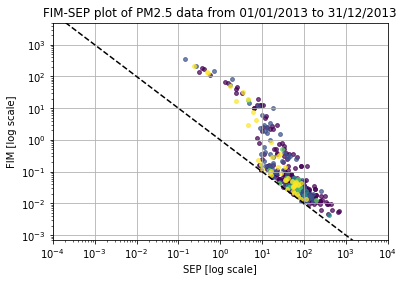

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.preprocessing import LabelEncoder

def area_to_int(area):
    if area == 'urban':
        return 0
    elif area == 'suburban':
        return 1
    elif area == 'rural':
        return 4
    elif area == 'rural-regional':
        return 3
    else:
        return 2

# first_row_SEP = SEP.iloc[int(round((4*365)/7, 0))]
# first_row_FIM = FIM.iloc[int(round((4*365)/7, 0))]

first_row_SEP = SEP.iloc[0]
first_row_FIM = FIM.iloc[0]

non_nan_indices = (~first_row_SEP.isna()) & (~first_row_FIM.isna())

filtered_SEP = first_row_SEP[non_nan_indices]
filtered_FIM = first_row_FIM[non_nan_indices]

fig, ax = plt.subplots()

area_colors = reordered_metadata.set_index('Stations')['Area'].apply(area_to_int).loc[filtered_SEP.index]

cmap = get_cmap('viridis', 5)  # Use viridis with 5 categories

# Create a legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/4), edgecolor=cmap(i/4), label=label) 
                   for i, label in enumerate(['Urban', 'Suburban', 'Other', 'Rural-Regional', 'Rural'])]


for area_type, area_group in area_colors.groupby(lambda x: area_colors[x]):
    color = cmap(area_type / 4)  # Normalize to range [0, 1]
    mask = area_colors.apply(lambda x: x) == area_type
    mask_array = np.array(mask.values, dtype=bool)
    scatter = ax.scatter(filtered_SEP[mask_array], filtered_FIM[mask_array], alpha=0.7, s=15, c=color, label=area_type)

# Plot a black line for the 1:1 line
# ax.plot([1e-3, 1e3], [1e-3, 1e3], color='black', linestyle='--')

# Plot a line for the 1:-1 line
ax.plot([1e-4, 1e4], [1e4, 1e-4], color='black', linestyle='--')

# Set x between 1e-3 and 3e3
ax.set_xlim(1e-4, 1e4)
ax.set_ylim(7e-4, 5e3)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('SEP [log scale]')
ax.set_ylabel('FIM [log scale]')

ax.tick_params(axis='both', which='major')


ax.set_title('FIM-SEP plot of PM2.5 data from 01/01/2013 to 31/12/2013')
ax.grid(True)

ax.legend(handles=legend_elements, title='Area type')

plt.show()

# save figure
fig.savefig('images/FIM_SEP_PM25_2013.png', dpi=300, facecolor = "white")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

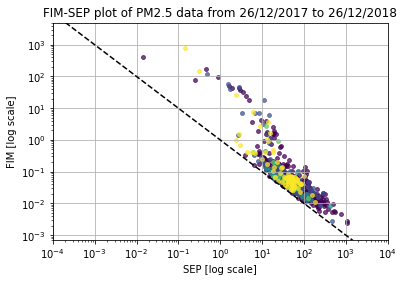

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.preprocessing import LabelEncoder

def area_to_int(area):
    if area == 'urban':
        return 0
    elif area == 'suburban':
        return 1
    elif area == 'rural':
        return 4
    elif area == 'rural-regional':
        return 3
    else:
        return 2

# first_row_SEP = SEP.iloc[int(round((4*365)/7, 0))]
# first_row_FIM = FIM.iloc[int(round((4*365)/7, 0))]

first_row_SEP = SEP.iloc[-1]
first_row_FIM = FIM.iloc[-1]

non_nan_indices = (~first_row_SEP.isna()) & (~first_row_FIM.isna())

filtered_SEP = first_row_SEP[non_nan_indices]
filtered_FIM = first_row_FIM[non_nan_indices]

fig, ax = plt.subplots()

area_colors = reordered_metadata.set_index('Stations')['Area'].apply(area_to_int).loc[filtered_SEP.index]

cmap = get_cmap('viridis', 5)  # Use viridis with 5 categories

# Create a legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/4), edgecolor=cmap(i/4), label=label) 
                   for i, label in enumerate(['Urban', 'Suburban', 'Other', 'Rural-Regional', 'Rural'])]

for area_type, area_group in area_colors.groupby(lambda x: area_colors[x]):
    color = cmap(area_type / 4)  # Normalize to range [0, 1]
    mask = area_colors.apply(lambda x: x) == area_type
    mask_array = np.array(mask.values, dtype=bool)
    scatter = ax.scatter(filtered_SEP[mask_array], filtered_FIM[mask_array], alpha=0.7, s=15, c=color, label=area_type)

# Plot a black line for the 1:1 line
# ax.plot([1e-3, 1e3], [1e-3, 1e3], color='black', linestyle='--')

# Plot a line for the 1:-1 line
ax.plot([1e-4, 1e4], [1e4, 1e-4], color='black', linestyle='--')

# Set x between 1e-3 and 3e3
ax.set_xlim(1e-4, 1e4)
ax.set_ylim(7e-4, 5e3)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('SEP [log scale]')
ax.set_ylabel('FIM [log scale]')

ax.tick_params(axis='both', which='major')


ax.set_title('FIM-SEP plot of PM2.5 data from 26/12/2017 to 26/12/2018')
ax.grid(True)

# ax.legend(handles=legend_elements, title='Area type')

plt.show()

# save figure
fig.savefig('images/FIM_SEP_PM25_2018.png', dpi=300, facecolor = "white")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

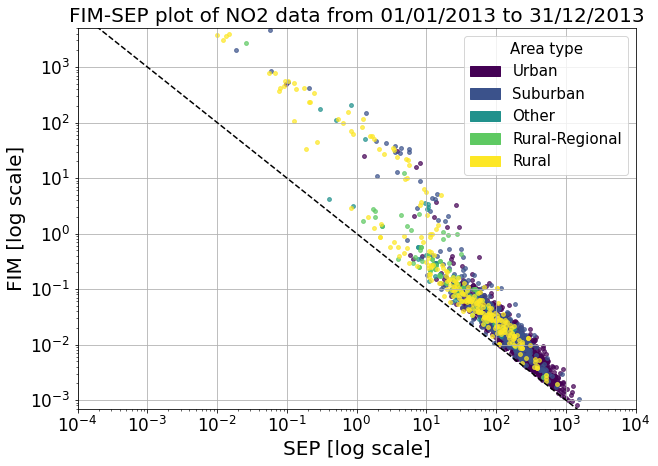

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.preprocessing import LabelEncoder

SEP = pd.read_csv("SEP_NO2.csv", index_col=0)
FIM = pd.read_csv("FIM_NO2.csv", index_col=0)
reordered_metadata = pd.read_csv("metadata_NO2_FSC.csv")

def area_to_int(area):
    if area == 'urban':
        return 0
    elif area == 'suburban':
        return 1
    elif area == 'rural':
        return 4
    elif area == 'rural-regional':
        return 3
    else:
        return 2

# first_row_SEP = SEP.iloc[int(round((4*365)/7, 0))]
# first_row_FIM = FIM.iloc[int(round((4*365)/7, 0))]

first_row_SEP = SEP.iloc[0]
first_row_FIM = FIM.iloc[0]

non_nan_indices = (~first_row_SEP.isna()) & (~first_row_FIM.isna())

filtered_SEP = first_row_SEP[non_nan_indices]
filtered_FIM = first_row_FIM[non_nan_indices]

fig, ax = plt.subplots()

area_colors = reordered_metadata.set_index('Stations')['Area'].apply(area_to_int).loc[filtered_SEP.index]

cmap = get_cmap('viridis', 5)  # Use viridis with 5 categories

# Create a legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/4), edgecolor=cmap(i/4), label=label) 
                   for i, label in enumerate(['Urban', 'Suburban', 'Other', 'Rural-Regional', 'Rural'])]

for area_type, area_group in area_colors.groupby(lambda x: area_colors[x]):
    color = cmap(area_type / 4)  # Normalize to range [0, 1]
    mask = area_colors.apply(lambda x: x) == area_type
    mask_array = np.array(mask.values, dtype=bool)
    scatter = ax.scatter(filtered_SEP[mask_array], filtered_FIM[mask_array], alpha=0.7, s=15, c=color, label=area_type)

# Plot a black line for the 1:1 line
# ax.plot([1e-3, 1e3], [1e-3, 1e3], color='black', linestyle='--')

# Plot a line for the 1:-1 line
ax.plot([1e-4, 1e4], [1e4, 1e-4], color='black', linestyle='--')

# Set x between 1e-3 and 3e3
ax.set_xlim(1e-4, 1e4)
ax.set_ylim(7e-4, 5e3)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('SEP [log scale]')
ax.set_ylabel('FIM [log scale]')

ax.tick_params(axis='both', which='major')


ax.set_title('FIM-SEP plot of NO2 data from 01/01/2013 to 31/12/2013')
ax.grid(True)

ax.legend(handles=legend_elements, title='Area type')

plt.show()

# save figure
fig.savefig('images/FIM_SEP_NO2_2013.png', dpi=300, facecolor = "white")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

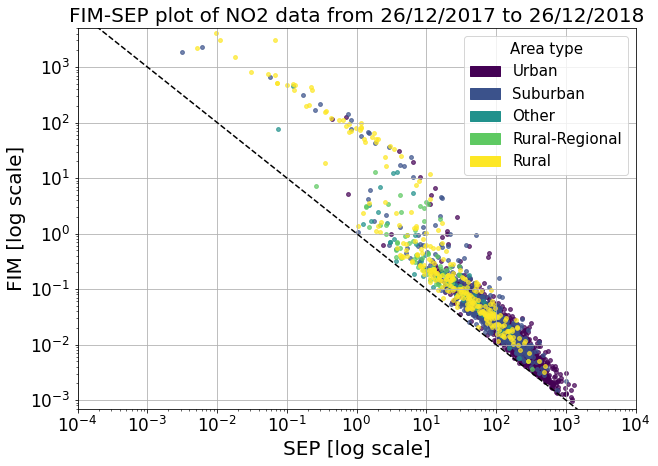

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.preprocessing import LabelEncoder

def area_to_int(area):
    if area == 'urban':
        return 0
    elif area == 'suburban':
        return 1
    elif area == 'rural':
        return 4
    elif area == 'rural-regional':
        return 3
    else:
        return 2

# first_row_SEP = SEP.iloc[int(round((4*365)/7, 0))]
# first_row_FIM = FIM.iloc[int(round((4*365)/7, 0))]

first_row_SEP = SEP.iloc[-1]
first_row_FIM = FIM.iloc[-1]

non_nan_indices = (~first_row_SEP.isna()) & (~first_row_FIM.isna())

filtered_SEP = first_row_SEP[non_nan_indices]
filtered_FIM = first_row_FIM[non_nan_indices]

fig, ax = plt.subplots()

area_colors = reordered_metadata.set_index('Stations')['Area'].apply(area_to_int).loc[filtered_SEP.index]

cmap = get_cmap('viridis', 5)  # Use viridis with 5 categories

# Create a legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/4), edgecolor=cmap(i/4), label=label) 
                   for i, label in enumerate(['Urban', 'Suburban', 'Other', 'Rural-Regional', 'Rural'])]

for area_type, area_group in area_colors.groupby(lambda x: area_colors[x]):
    color = cmap(area_type / 4)  # Normalize to range [0, 1]
    mask = area_colors.apply(lambda x: x) == area_type
    mask_array = np.array(mask.values, dtype=bool)
    scatter = ax.scatter(filtered_SEP[mask_array], filtered_FIM[mask_array], alpha=0.7, s=15, c=color, label=area_type)

# Plot a black line for the 1:1 line
# ax.plot([1e-3, 1e3], [1e-3, 1e3], color='black', linestyle='--')

# Plot a line for the 1:-1 line
ax.plot([1e-4, 1e4], [1e4, 1e-4], color='black', linestyle='--')

# Set x between 1e-3 and 3e3
ax.set_xlim(1e-4, 1e4)
ax.set_ylim(7e-4, 5e3)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('SEP [log scale]')
ax.set_ylabel('FIM [log scale]')

ax.tick_params(axis='both', which='major')


ax.set_title('FIM-SEP plot of NO2 data from 26/12/2017 to 26/12/2018')
ax.grid(True)

ax.legend(handles=legend_elements, title='Area type')

plt.show()

# save figure
fig.savefig('images/FIM_SEP_PM25_2018.png', dpi=300, facecolor = "white")

#### Extreme point analysis and map

In [417]:
SEP = pd.read_csv('SEP_NO2.csv', index_col=0)
FIM = pd.read_csv('FIM_NO2.csv', index_col=0)
FSC = pd.read_csv('FSC_NO2.csv', index_col=0)

metadata = pd.read_csv('metadata_NO2_FSC.csv')
# Select column name with second lower value for SEP.iloc[0]
rural_station_NO2 = SEP.iloc[0].sort_values().index[1]
urban_station_NO2 = FIM.iloc[0].idxmin()
rural_station_info_NO2 = metadata.loc[metadata.Stations == rural_station_NO2]
print(rural_station_info_NO2.Area)
urban_station_info_NO2 = metadata.loc[metadata.Stations == urban_station_NO2]
print(urban_station_info_NO2.Area)

1812    rural
Name: Area, dtype: object
2863    urban
Name: Area, dtype: object


In [418]:
SEP = pd.read_csv('SEP_PM25.csv', index_col=0)
FIM = pd.read_csv('FIM_PM25.csv', index_col=0)
FSC = pd.read_csv('FSC_PM25.csv', index_col=0)

metadata = pd.read_csv('metadata_PM25_FSC.csv')
# Select column name with second lower value for SEP.iloc[0]
rural_station_PM25 = SEP.iloc[0].sort_values().index[1]
urban_station_PM25 = FIM.iloc[0].sort_values().index[-16]
rural_station_info_PM25 = metadata.loc[metadata.Stations == rural_station_PM25]
print(rural_station_info_PM25.Area)
urban_station_info_PM25 = metadata.loc[metadata.Stations == urban_station_PM25]
print(urban_station_info_PM25.Area)

813    rural
Name: Area, dtype: object
977    urban
Name: Area, dtype: object


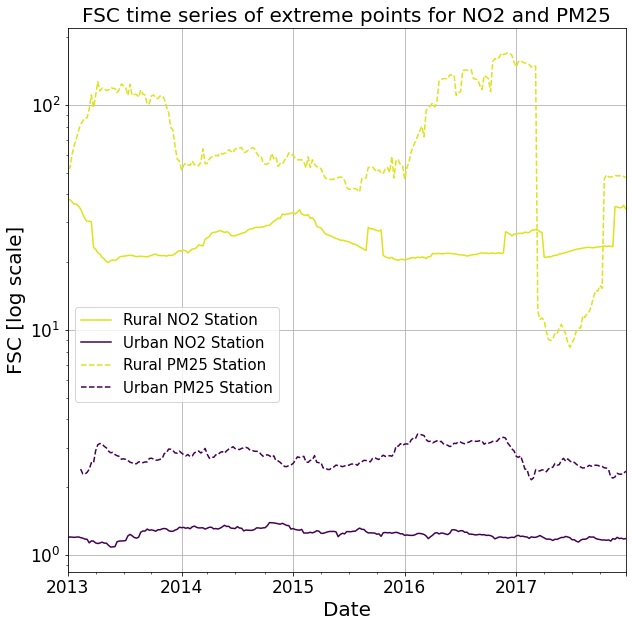

In [432]:
from matplotlib.cm import get_cmap
fig, ax = plt.subplots()
FSC_NO2 = pd.read_csv("FSC_NO2.csv", index_col=0)
cmap = get_cmap('viridis', 20)


FSC_NO2.index = pd.to_datetime(FSC_NO2.index, format='%Y-%m-%d')
FSC_NO2[rural_station_NO2].plot(color = cmap(18), label = 'Rural NO2 Station')
FSC_NO2[urban_station_NO2].plot(color = cmap(0), label = 'Urban NO2 Station')
FSC_PM25= pd.read_csv("FSC_PM25.csv", index_col=0)
FSC_PM25.index = pd.to_datetime(FSC_PM25.index, format='%Y-%m-%d')
FSC_PM25[rural_station_PM25].plot(color = cmap(18), label = 'Rural PM25 Station', style = '--')
FSC_PM25[urban_station_PM25].plot(color = cmap(0), label = 'Urban PM25 Station', style = '--')

# Set x label size 15
ax.set_xlabel('Date')
ax.set_ylabel('FSC [log scale]',) 


# print legend in the midle left
ax.legend(loc='center left', bbox_to_anchor=(0, 0.4))

# set y log scale
ax.set_yscale('log')

# grid
ax.grid(True)

plt.title('FSC time series of extreme points for NO2 and PM25')

# save figure
fig.savefig('images/FSC_NO2_PM25_extremes.png', dpi=300, facecolor = "white")

plt.show()


In [526]:
#read text file max_station_NO2.txt and put in a string
with open('max_station_NO2.txt', 'r') as file:
    max_station_NO2 = file.read().replace('\n', '')

with open('max_station_PM25.txt', 'r') as file:
    max_station_PM25 = file.read().replace('\n', '')

In [527]:
NO2_metadata = pd.read_csv('metadata_NO2_FSC.csv')
PM25_metadata = pd.read_csv('metadata_PM25_FSC.csv')

In [528]:
max_NO2 = NO2_metadata.loc[NO2_metadata.Stations == max_station_NO2]
max_PM25 = PM25_metadata.loc[PM25_metadata.Stations == max_station_PM25]

In [535]:
import folium
from folium.features import DivIcon

cmap = get_cmap('viridis', 4)

long_rural_NO2 = rural_station_info_NO2["Longitude"]
lat_rural_NO2 = rural_station_info_NO2["Latitude"]

long_urban_NO2 = urban_station_info_NO2["Longitude"]
lat_urban_NO2= urban_station_info_NO2["Latitude"]

long_rural_PM25 = rural_station_info_PM25["Longitude"]
lat_rural_PM25 = rural_station_info_PM25["Latitude"]

long_urban_PM25 = urban_station_info_PM25["Longitude"]
lat_urban_PM25= urban_station_info_PM25["Latitude"]

long_max_NO2 = max_NO2["Longitude"]
lat_max_NO2 = max_NO2["Latitude"]

long_max_PM25 = max_PM25["Longitude"]
lat_max_PM25 = max_PM25["Latitude"]

# Create a map centered around Europe
map_europe = folium.Map(location=[52, 13], zoom_start=4)

folium.CircleMarker(
    location=[lat_rural_NO2, long_rural_NO2],
    radius=5,
    color= "yellow",
    fill=True,
    fill_color="yellow",
    fill_opacity=1,
).add_to(map_europe)

folium.CircleMarker(
    location=[lat_urban_NO2, long_urban_NO2],
    radius=5,
    color= "purple",
    fill=True,
    fill_color="purple",
    fill_opacity=1,
).add_to(map_europe)

folium.CircleMarker(
    location=[lat_rural_PM25, long_rural_PM25],
    radius=5,
    color= "black",
    fill=True,
    fill_color="yellow",
    fill_opacity=1,
).add_to(map_europe)

folium.CircleMarker(
    location=[lat_urban_PM25, long_urban_PM25],
    radius=5,
    color= "black",
    fill=True,
    fill_color="purple",
    fill_opacity=1,
).add_to(map_europe)

folium.CircleMarker(
    location=[lat_max_NO2, long_max_NO2],
    radius=5,
    color= "green",
    fill=True,
    fill_color="green",
    fill_opacity=1,
).add_to(map_europe)

folium.CircleMarker(
    location=[lat_max_PM25, long_max_PM25],
    radius=5,
    color= "black",
    fill=True,
    fill_color="green",
    fill_opacity=1,
).add_to(map_europe)

# Define the legend html
# legend_html = """
#      <div style="position: fixed; 
#      bottom: 50px; right: 50px; width: 730px; height: 140x; 
#      border:2px solid grey; z-index:9999; font-size:14px;
#      background-color: white; opacity: 1;">
#      &nbsp;<b>Stations location</b><br>
#      &nbsp; <i class="fa fa-circle fa-1x" style="color:yellow"></i>&nbsp;Station located at the top left corner of the FIM-SEP plot (rural station) based on NO2 concentration data<br>
#      &nbsp; <i class="fa fa-circle fa-1x" style="color:purple"></i>&nbsp;Station located at the bottom right corner of the FIM-SEP plot (urban station) based on NO2 concentration data<br>
#      &nbsp; <i class="fa fa-circle fa-1x" style="color:yellow"></i>&nbsp;Station located at the top left corner of the FIM-SEP plot (rural station) based on PM2.5 concentration data<br>
#      &nbsp; <i class="fa fa-circle fa-1x" style="color:purple"></i>&nbsp;Station located at the bottom right corner of the FIM-SEP plot (urban station) based on PM2.5 concentration data<br>
#      &nbsp; <i class="fa fa-circle fa-1x" style="color:green"></i>&nbsp;Station with highest mean FSC based on NO2 concentration data<br>
#      &nbsp; <i class="fa fa-circle fa-1x" style="color:green"></i>&nbsp;Station with highest mean FSC based on PM2.5 concentration data<br>
#      </div>
#      """

legend_html = """
     <div style="position: fixed; 
     bottom: 50px; right: 50px; width: 730px; height: 140px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white; opacity: 1;">
     &nbsp;<b>Stations location</b><br>
     &nbsp; <div style="display: inline-block; width: 10px; height: 10px; border: 0px solid black; background: yellow; border-radius: 50%;"></div>&nbsp;Station located at the top left corner of the FIM-SEP plot (rural station) based on NO2 concentration data<br>
     &nbsp; <div style="display: inline-block; width: 10px; height: 10px; border: 0px solid black; background: purple; border-radius: 50%;"></div>&nbsp;Station located at the bottom right corner of the FIM-SEP plot (urban station) based on NO2 concentration data<br>
     &nbsp; <div style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; background: yellow; border-radius: 50%;"></div>&nbsp;Station located at the top left corner of the FIM-SEP plot (rural station) based on PM2.5 concentration data<br>
     &nbsp; <div style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; background: purple; border-radius: 50%;"></div>&nbsp;Station located at the bottom right corner of the FIM-SEP plot (urban station) based on PM2.5 concentration data<br>
     &nbsp; <div style="display: inline-block; width: 10px; height: 10px; border: 0px solid black; background: green; border-radius: 50%;"></div>&nbsp;Station with highest mean FSC based on NO2 concentration data<br>
     &nbsp; <div style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; background: green; border-radius: 50%;"></div>&nbsp;Station with highest mean FSC based on PM2.5 concentration data<br>
     </div>
     """
map_europe.get_root().html.add_child(folium.Element(legend_html))

# Save the map as an HTML file
map_europe.save("images/map_all_stations.html")

#### Max FSC analysis

In [477]:
FSC = pd.read_csv("FSC_NO2.csv")
SEP = pd.read_csv("SEP_NO2.csv")
FIM = pd.read_csv("FIM_NO2.csv")

FSC_mean = FSC.mean(axis=0)
# Select maximum value and maximum index of FSC_mean
i = 6
max_value = FSC_mean.sort_values(ascending=False)[i]
max_index = FSC_mean.sort_values(ascending=False).index[i]
# Select FIM and SEP columns where the column name is equal to max_index
FIM_max = FIM[max_index]
SEP_max = SEP[max_index]
FSC_max = FSC[max_index]
# create dataframe with index same as SEP index, and columns FIM_max and SEP_max
FIM_SEP_max = pd.DataFrame({'FIM_max': FIM_max, 'SEP_max': SEP_max})
FIM_SEP_max.index = SEP.Datetime
FSC_max = pd.DataFrame({'FSC_max': FSC_max})
FSC_max.index = SEP.Datetime
percent_nan = FIM_SEP_max.isna().sum() / len(FIM_SEP_max) * 100
print(max_value)
print(percent_nan)

109.68418425153092
FIM_max    0.0
SEP_max    0.0
dtype: float64


C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\494493300.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  FSC_mean = FSC.mean(axis=0)


In [478]:
# save max_index into a text file
with open('max_station_NO2.txt', 'w') as f:
    f.write(max_index)

In [480]:
FIM_SEP_max.index = pd.to_datetime(FIM_SEP_max.index)

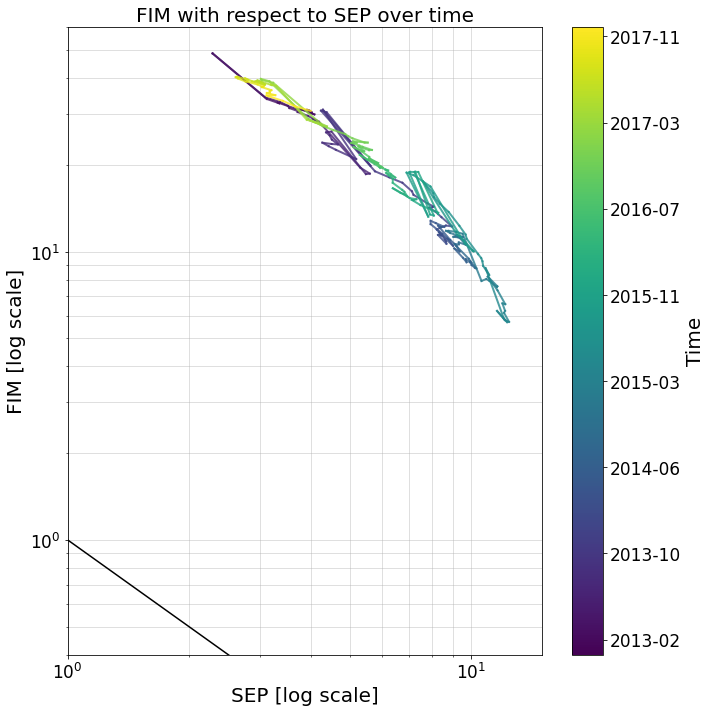

In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.cm import ScalarMappable

# Assuming you have a DataFrame named FIM_SEP_max with columns 'FIM_max', 'SEP_max', and a Datetime index
# You can replace this with your actual DataFrame
# FIM_SEP_max = ...

fig, ax = plt.subplots()

# Normalize the time index for colormap
time_index = FIM_SEP_max.index
norm = plt.Normalize(mdates.date2num(time_index.min()), mdates.date2num(time_index.max()))
cmap = plt.get_cmap('viridis')

for i in range(1, len(FIM_SEP_max)):
    plt.plot(FIM_SEP_max['SEP_max'].iloc[i-1:i+1], FIM_SEP_max['FIM_max'].iloc[i-1:i+1],
             color=cmap(norm(mdates.date2num(time_index[i]))), lw=2, alpha=0.8)

x_values = np.linspace(1e-3, 1e3, 1000)
y_values = 1 / x_values
ax.plot(x_values, y_values, 'k')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlim(1, 15)
ax.set_ylim(0.4, 60)

# grid
ax.grid(True, which="both", ls="-", alpha=0.5)

ax.set_xlabel('SEP [log scale]')
ax.set_ylabel('FIM [log scale]')
ax.set_title('FIM with respect to SEP over time')

# Create a colorbar with the viridis colormap and link it to the time index
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.ax.set_ylabel('Time')
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.tick_params(axis='both', which='major')
cbar.ax.tick_params(axis='both', which='major', labelsize=17)
plt.tight_layout()
# save figure
plt.savefig('images/FIM_SEP_max_FSC_NO2.png', dpi=300, facecolor = "white")

plt.show()

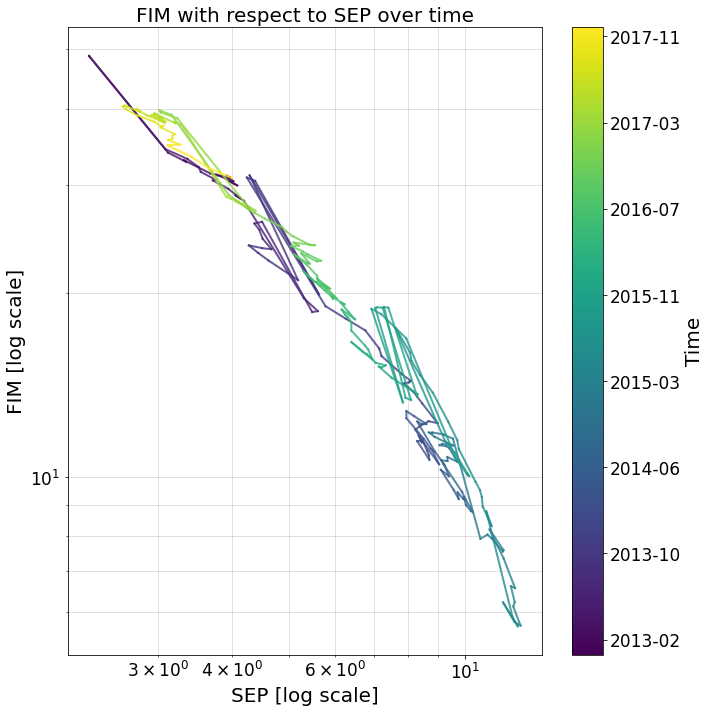

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.cm import ScalarMappable

# Assuming you have a DataFrame named FIM_SEP_max with columns 'FIM_max', 'SEP_max', and a Datetime index
# You can replace this with your actual DataFrame
# FIM_SEP_max = ...

fig, ax = plt.subplots()

# Normalize the time index for colormap
time_index = FIM_SEP_max.index
norm = plt.Normalize(mdates.date2num(time_index.min()), mdates.date2num(time_index.max()))
cmap = plt.get_cmap('viridis')

for i in range(1, len(FIM_SEP_max)):
    plt.plot(FIM_SEP_max['SEP_max'].iloc[i-1:i+1], FIM_SEP_max['FIM_max'].iloc[i-1:i+1],
             color=cmap(norm(mdates.date2num(time_index[i]))), lw=2, alpha=0.8)

ax.set_yscale('log')
ax.set_xscale('log')

# grid
ax.grid(True, which="both", ls="-", alpha=0.5)

ax.set_xlabel('SEP [log scale]')
ax.set_ylabel('FIM [log scale]')
ax.set_title('FIM with respect to SEP over time')

# Create a colorbar with the viridis colormap and link it to the time index
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.ax.set_ylabel('Time')
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.tick_params(axis='both', which='major')
cbar.ax.tick_params(axis='both', which='major', labelsize=17)
plt.tight_layout()

# save figure
plt.savefig('images/FIM_SEP_max_FSC_NO2_without_bar.png', dpi=300, facecolor = "white")

plt.show()

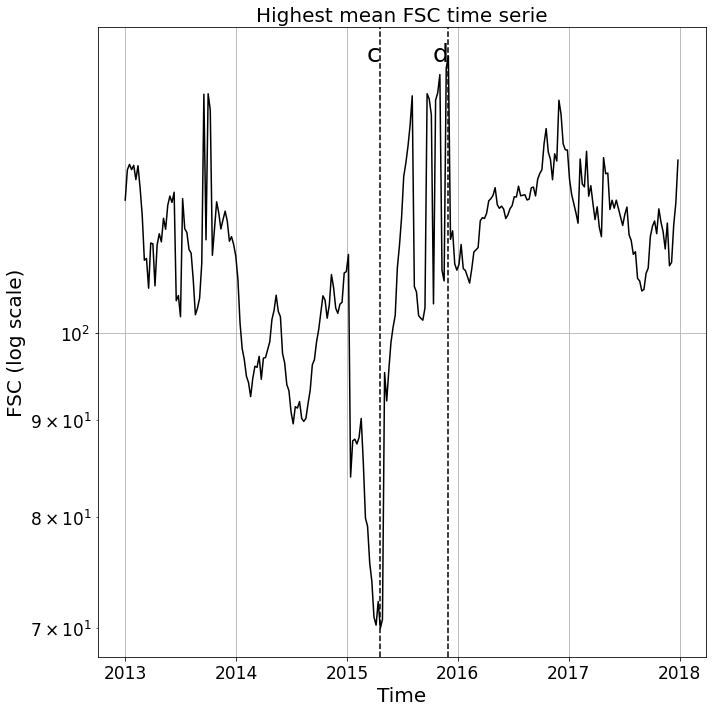

In [484]:
# plot time serie FSC_max with index as x axis and FSC_max as y axis
fig, ax = plt.subplots()
FSC_max.index = pd.to_datetime(FSC_max.index)
ax.plot(FSC_max.index, FSC_max, color="black")

min_date = FSC_max.idxmin()
max_date = FSC_max.sort_values(ascending=False, by = "FSC_max").index[0]

ax.axvline(min_date, color='black', linestyle='--')
ax.axvline(max_date, color='black', linestyle='--')

# adjust these values to move the text up or down
adjustment_factor = 0.03

ax.text(min_date, ax.get_ylim()[1]*(1-adjustment_factor), 'c', horizontalalignment='right', size=25)
ax.text(max_date, ax.get_ylim()[1]*(1-adjustment_factor), 'd', horizontalalignment='right', size=25)


ax.set_xlabel('Time')
ax.set_ylabel('FSC (log scale)')
# set y axis logaritmic scale
ax.set_yscale('log')
# set grid on
ax.grid()
ax.set_title('Highest mean FSC time serie')
ax.tick_params(axis='both', which='major')
plt.tight_layout()


# save figure
plt.savefig('images/FSC_max_time_serie_NO2.png', dpi=300, facecolor = "white")

plt.show()

In [485]:
df = pd.read_csv("NO2.csv")

In [486]:
df.set_index('Datetime', inplace=True)

In [487]:
# Select column of NO2 where column name is FSC_max.name
df = df[df.columns[df.columns.str.contains(max_index)]]

In [488]:
df['Missing_Percentage'] = np.nan

# Calculate the percentage of missing values in the next year for each point
for i in range(len(df) - 365 * 24):
    df.loc[df.index[i], 'Missing_Percentage'] = df[max_index].iloc[i:i + 365 * 24].isnull().mean() * 100

# Drop the rows at the end of the dataframe where we couldn't look ahead one year
df = df.dropna()

In [489]:
df.index = pd.to_datetime(df.index)

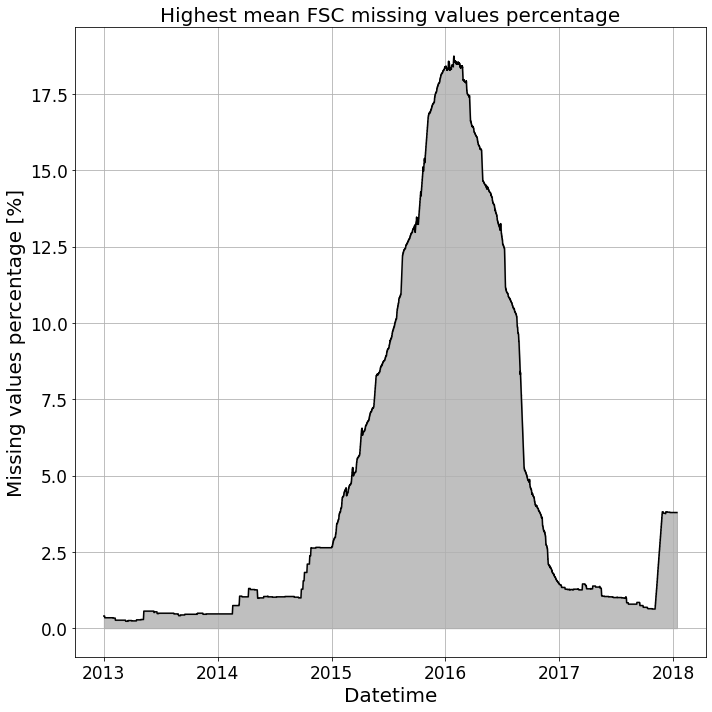

In [490]:
# Create the plot
fig, ax = plt.subplots()
ax.plot(df.index, df['Missing_Percentage'], color = "black")
ax.set_title('Highest mean FSC missing values percentage', size = 20)
ax.set_xlabel('Datetime')
ax.set_ylabel('Missing values percentage [%]')
ax.fill_between(df.index, df['Missing_Percentage'], color="grey", alpha = 0.5)
ax.tick_params(axis='both', which='major')
ax.grid()

#save figure
plt.tight_layout()
plt.savefig('images/FSC_max_missing_values_percentage_NO2.png', dpi=300, facecolor = "white")

plt.show()

In [493]:
# if 'min_date' is a pandas Series/DataFrame, you should use 'iloc' instead of 'values'
min_date_aware = pd.Timestamp(min_date.values[0]).tz_localize('UTC')  # replace 'UTC' with your actual timezone
df1 = df.loc[df.index > min_date_aware].head(24*365)


In [494]:
df2 = df.loc[df.index > max_date].head(24*365)

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\3031155505.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[max_index], color="black")


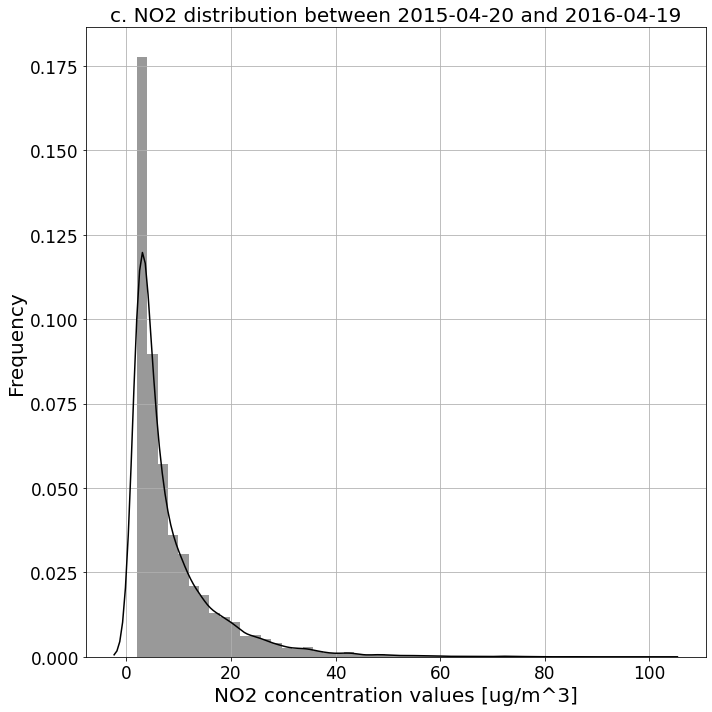

In [495]:
import seaborn as sns
sns.distplot(df1[max_index], color="black")

plt.title("c. NO2 distribution between " + min_date_aware.strftime('%Y-%m-%d') + 
          " and " + (min_date_aware + pd.Timedelta(days=365)).strftime('%Y-%m-%d'))
plt.xlabel("NO2 concentration values [ug/m^3]")
plt.ylabel('Frequency')

#grid
plt.grid()

#save figure
plt.tight_layout()
plt.savefig('images/NO2_distribution_min_peak.png', dpi=300, facecolor = "white")

plt.show()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4151477354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[max_index], color="black")


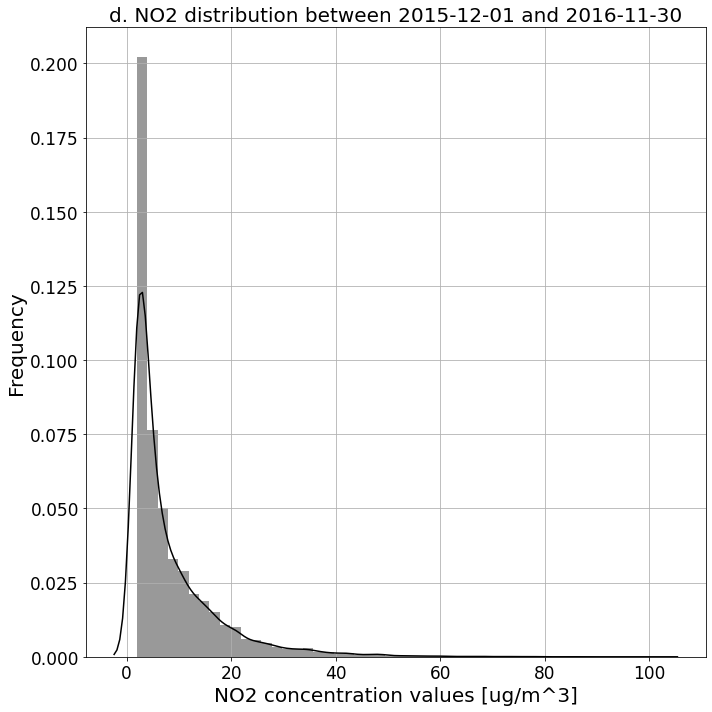

In [496]:
import seaborn as sns
sns.distplot(df2[max_index], color="black")

plt.title("d. NO2 distribution between " + max_date.strftime('%Y-%m-%d') + 
          " and " + (max_date + pd.Timedelta(days=365)).strftime('%Y-%m-%d'))
plt.xlabel("NO2 concentration values [ug/m^3]")
plt.ylabel('Frequency')

#grid
plt.grid()

#save figure
plt.tight_layout()
plt.savefig('images/NO2_distribution_max_peak.png', dpi=300, facecolor = "white")

plt.show()

In [499]:
FSC = pd.read_csv("FSC_PM25.csv")
SEP = pd.read_csv("SEP_PM25.csv")
FIM = pd.read_csv("FIM_PM25.csv")

FSC_mean = FSC.mean(axis=0)
# Select maximum value and maximum index of FSC_mean
i = 2
max_value = FSC_mean.sort_values(ascending=False)[i]
max_index = FSC_mean.sort_values(ascending=False).index[i]
# Select FIM and SEP columns where the column name is equal to max_index
FIM_max = FIM[max_index]
SEP_max = SEP[max_index]
FSC_max = FSC[max_index]
# create dataframe with index same as SEP index, and columns FIM_max and SEP_max
FIM_SEP_max = pd.DataFrame({'FIM_max': FIM_max, 'SEP_max': SEP_max})
FIM_SEP_max.index = SEP.Datetime
FSC_max = pd.DataFrame({'FSC_max': FSC_max})
FSC_max.index = SEP.Datetime
percent_nan = FIM_SEP_max.isna().sum() / len(FIM_SEP_max) * 100
print(max_value)
print(percent_nan)

98.95639848764802
FIM_max    0.0
SEP_max    0.0
dtype: float64


C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\278512857.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  FSC_mean = FSC.mean(axis=0)


In [500]:
# save max_index as a text file
with open('max_station_PM25.txt', 'w') as f:
    f.write(max_index)

In [501]:
FIM_SEP_max.index = pd.to_datetime(FIM_SEP_max.index)

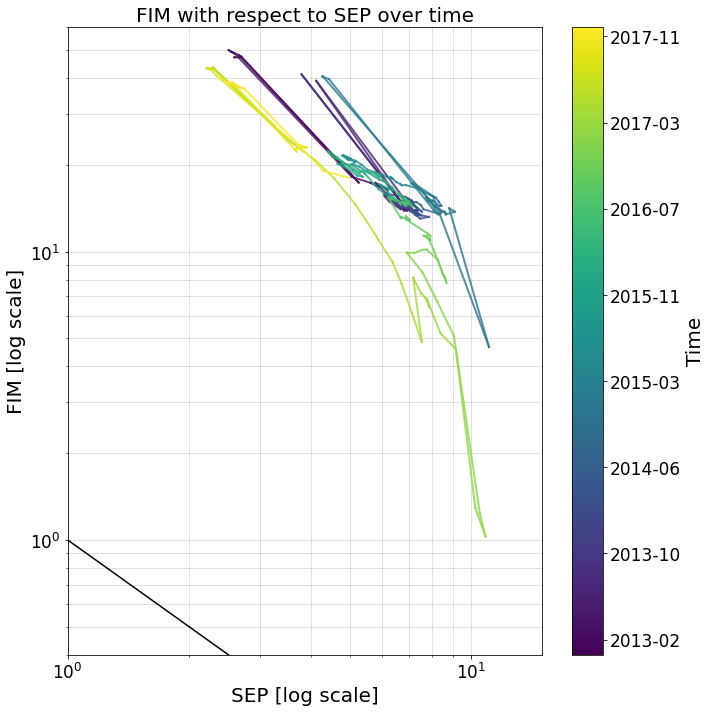

In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.cm import ScalarMappable

# Assuming you have a DataFrame named FIM_SEP_max with columns 'FIM_max', 'SEP_max', and a Datetime index
# You can replace this with your actual DataFrame
# FIM_SEP_max = ...

fig, ax = plt.subplots()

# Normalize the time index for colormap
time_index = FIM_SEP_max.index
norm = plt.Normalize(mdates.date2num(time_index.min()), mdates.date2num(time_index.max()))
cmap = plt.get_cmap('viridis')

for i in range(1, len(FIM_SEP_max)):
    plt.plot(FIM_SEP_max['SEP_max'].iloc[i-1:i+1], FIM_SEP_max['FIM_max'].iloc[i-1:i+1],
             color=cmap(norm(mdates.date2num(time_index[i]))), lw=2, alpha=0.8)

x_values = np.linspace(1e-3, 1e3, 1000)
y_values = 1 / x_values
ax.plot(x_values, y_values, 'k')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlim(1, 15)
ax.set_ylim(0.4, 60)

# grid
ax.grid(True, which="both", ls="-", alpha=0.5)

ax.set_xlabel('SEP [log scale]')
ax.set_ylabel('FIM [log scale]')
ax.set_title('FIM with respect to SEP over time')

# Create a colorbar with the viridis colormap and link it to the time index
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.ax.set_ylabel('Time')
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.tick_params(axis='both', which='major')
cbar.ax.tick_params(axis='both', which='major', labelsize=17)

plt.tight_layout()

# save figure
plt.savefig('images/FIM_SEP_max_FSC_PM25.png', dpi=300, facecolor = "white")

plt.show()

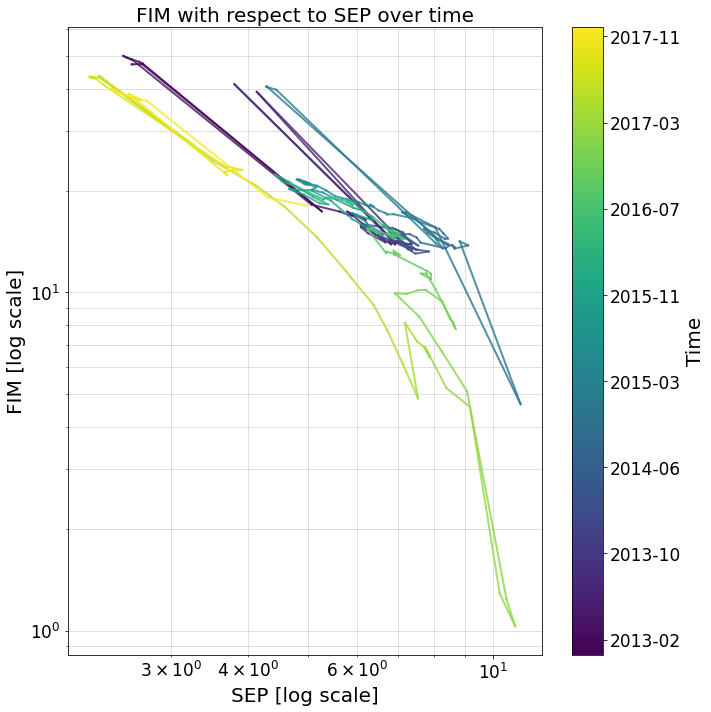

In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.cm import ScalarMappable

# Assuming you have a DataFrame named FIM_SEP_max with columns 'FIM_max', 'SEP_max', and a Datetime index
# You can replace this with your actual DataFrame
# FIM_SEP_max = ...

fig, ax = plt.subplots()

# Normalize the time index for colormap
time_index = FIM_SEP_max.index
norm = plt.Normalize(mdates.date2num(time_index.min()), mdates.date2num(time_index.max()))
cmap = plt.get_cmap('viridis')

for i in range(1, len(FIM_SEP_max)):
    plt.plot(FIM_SEP_max['SEP_max'].iloc[i-1:i+1], FIM_SEP_max['FIM_max'].iloc[i-1:i+1],
             color=cmap(norm(mdates.date2num(time_index[i]))), lw=2, alpha=0.8)

ax.set_yscale('log')
ax.set_xscale('log')

# grid
ax.grid(True, which="both", ls="-", alpha=0.5)

ax.set_xlabel('SEP [log scale]')
ax.set_ylabel('FIM [log scale]')
ax.set_title('FIM with respect to SEP over time')

# Create a colorbar with the viridis colormap and link it to the time index
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.ax.set_ylabel('Time')
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.tick_params(axis='both', which='major')
cbar.ax.tick_params(axis='both', which='major', labelsize=17)

plt.tight_layout()

# save figure
plt.savefig('images/FIM_SEP_max_FSC_PM25_without_bar.png', dpi=300, facecolor = "white")

plt.show()

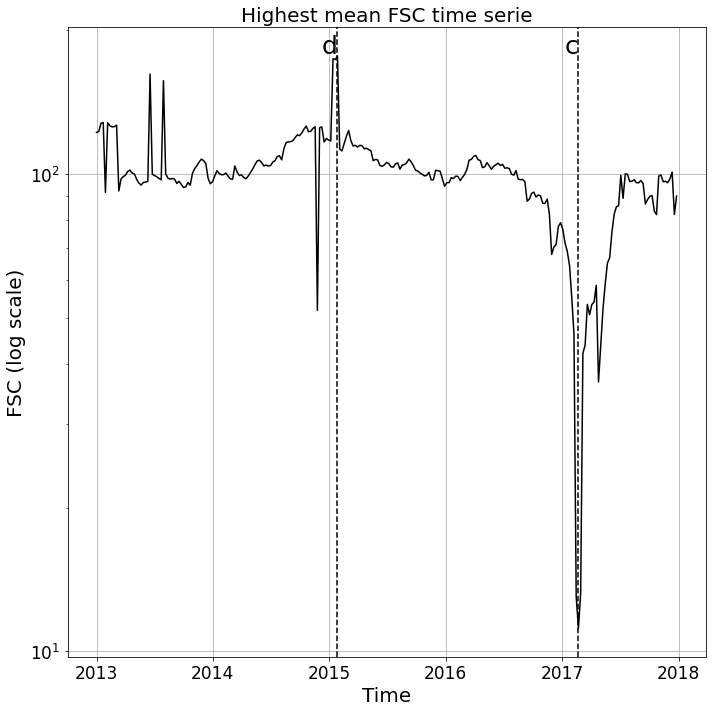

In [504]:
# plot time serie FSC_max with index as x axis and FSC_max as y axis
fig, ax = plt.subplots()
FSC_max.index = pd.to_datetime(FSC_max.index)
ax.plot(FSC_max.index, FSC_max, color="black")

min_date = FSC_max.idxmin()
max_date = FSC_max.sort_values(ascending=False, by = "FSC_max").index[0]

ax.axvline(min_date, color='black', linestyle='--')
ax.axvline(max_date, color='black', linestyle='--')

# adjust these values to move the text up or down
adjustment_factor = 0.03

ax.text(min_date, ax.get_ylim()[1]*(1-adjustment_factor), 'c', horizontalalignment='right', size=25)
ax.text(max_date, ax.get_ylim()[1]*(1-adjustment_factor), 'd', horizontalalignment='right', size=25)


ax.set_xlabel('Time')
ax.set_ylabel('FSC (log scale)')
# set y axis logaritmic scale
ax.set_yscale('log')
# set grid on
ax.grid()
ax.set_title('Highest mean FSC time serie')
ax.tick_params(axis='both', which='major')

plt.tight_layout()

# save figure
plt.savefig('images/FSC_max_time_serie_PM25.png', dpi=300, facecolor = "white")

plt.show()

In [505]:
df = pd.read_csv("PM25.csv")

In [506]:
df.set_index('Unnamed: 0', inplace=True)

In [507]:
# Select column of NO2 where column name is FSC_max.name
df = df[df.columns[df.columns.str.contains(max_index)]]

In [508]:
df['Missing_Percentage'] = np.nan

# Calculate the percentage of missing values in the next year for each point
for i in range(len(df) - 365 * 24):
    df.loc[df.index[i], 'Missing_Percentage'] = df[max_index].iloc[i:i + 365 * 24].isnull().mean() * 100

# Drop the rows at the end of the dataframe where we couldn't look ahead one year
df = df.dropna()

In [509]:
df.index = pd.to_datetime(df.index)

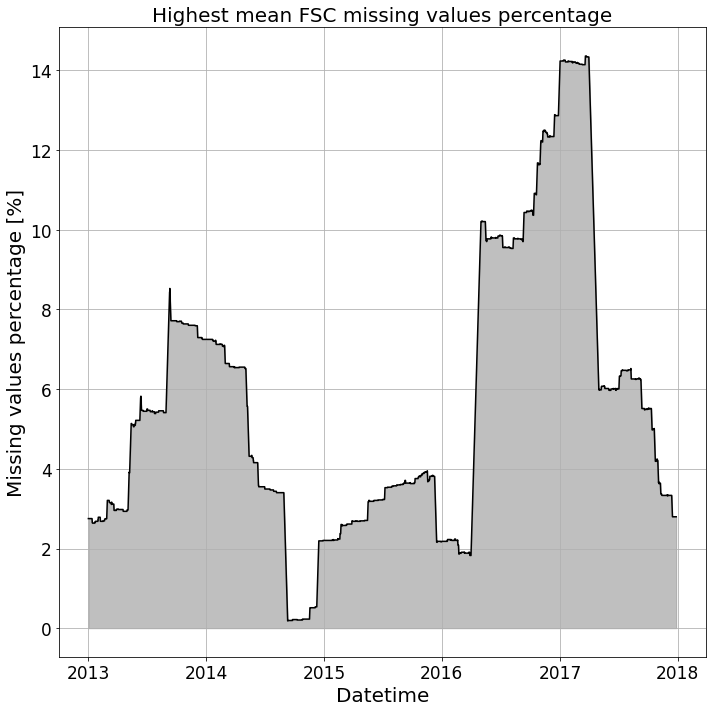

In [510]:
# Create the plot
fig, ax = plt.subplots()
ax.plot(df.index, df['Missing_Percentage'], color = "black")
ax.set_title('Highest mean FSC missing values percentage', size = 20)
ax.set_xlabel('Datetime')
ax.set_ylabel('Missing values percentage [%]')
ax.fill_between(df.index, df['Missing_Percentage'], color="grey", alpha = 0.5)
ax.tick_params(axis='both', which='major')
ax.grid()

plt.tight_layout()

#save figure
plt.savefig('images/FSC_max_missing_values_percentage_PM25.png', dpi=300, facecolor = "white")

plt.show()

In [511]:
# if 'min_date' is a pandas Series/DataFrame, you should use 'iloc' instead of 'values'
min_date_aware = pd.Timestamp(min_date.values[0]).tz_localize('UTC')  # replace 'UTC' with your actual timezone
df1 = df.loc[df.index > min_date_aware].head(24*365)

In [512]:
df2 = df.loc[df.index > max_date].head(24*365)

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\2872180546.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[max_index], color="black")


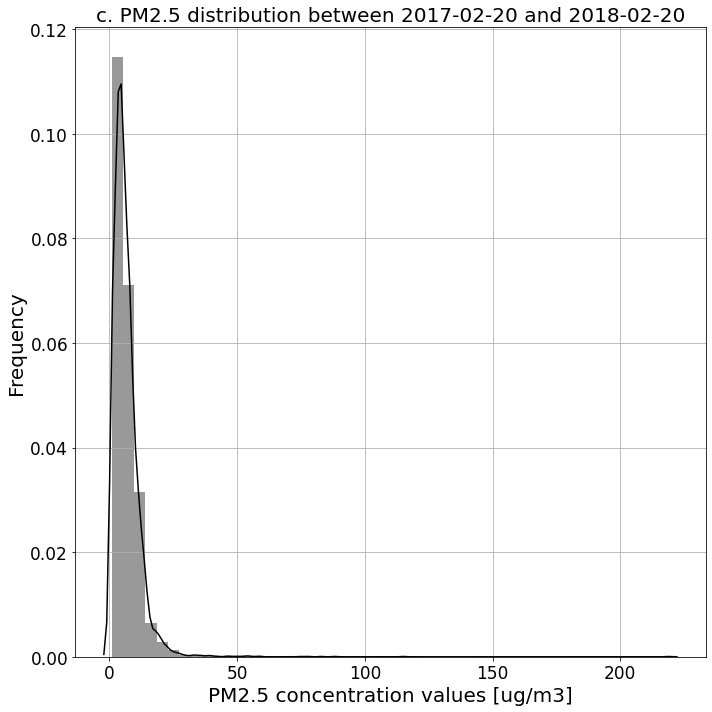

In [513]:
import seaborn as sns
sns.distplot(df1[max_index], color="black")

plt.title("c. PM2.5 distribution between " + min_date_aware.strftime('%Y-%m-%d') + 
          " and " + (min_date_aware + pd.Timedelta(days=365)).strftime('%Y-%m-%d'))
plt.xlabel("PM2.5 concentration values [ug/m3]")
plt.ylabel('Frequency')

#grid
plt.grid()

plt.tight_layout()

#save figure
plt.savefig('images/PM25_distribution_min_peak.png', dpi=300, facecolor = "white")

plt.show()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4148943218.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[max_index], color="black")


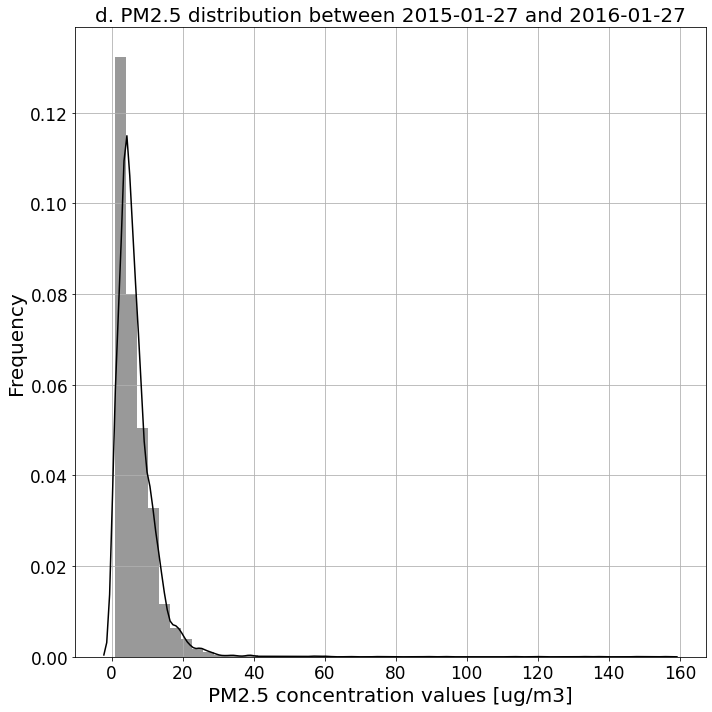

In [514]:
import seaborn as sns
sns.distplot(df2[max_index], color="black")

plt.title("d. PM2.5 distribution between " + max_date.strftime('%Y-%m-%d') + 
          " and " + (max_date + pd.Timedelta(days=365)).strftime('%Y-%m-%d'))
plt.xlabel("PM2.5 concentration values [ug/m3]")
plt.ylabel('Frequency')

#grid
plt.grid()

plt.tight_layout()

#save figure
plt.savefig('images/PM25_distribution_max_peak.png', dpi=300, facecolor = "white")

plt.show()

#### FSC Spatial and Temporal trends

In [518]:
FSC = pd.read_csv("FSC_NO2.csv", index_col = 0)
FSC.index = pd.to_datetime(FSC.index)
metadata = pd.read_csv("metadata_NO2.csv")

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4158994555.py:17: FutureWarning: ['Stations'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  FSC_lat_mean = FSC_lat.drop(columns=['Latitude']).groupby('Latitude_Binned').agg(mean_with_min_count).T


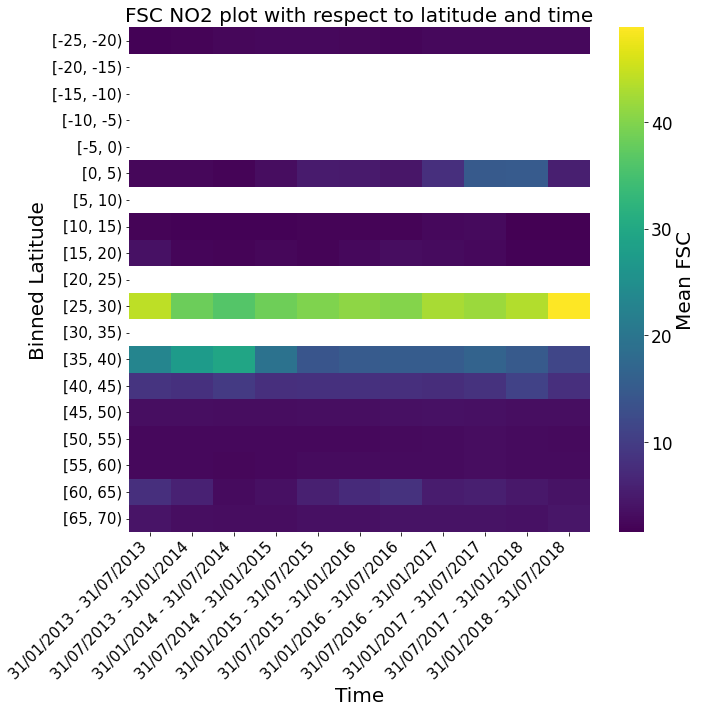

In [519]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Merge FSC and metadata DataFrames
FSC_lat = FSC.T.merge(metadata[['Stations', 'Latitude']], left_index=True, right_on='Stations', how='left')

# Bin latitude data into 5-degree intervals
FSC_lat['Latitude_Binned'] = pd.cut(FSC_lat['Latitude'], np.arange(-90, 91, 5), right=False)

# Compute the mean FSC value for each binned latitude and time
def mean_with_min_count(x):
    return x.mean() if len(x) >= 2 else np.nan

# Drop the 'Latitude' column before transposing the DataFrame
FSC_lat_mean = FSC_lat.drop(columns=['Latitude']).groupby('Latitude_Binned').agg(mean_with_min_count).T

# Bin time data into 6-month intervals
FSC_lat_mean.index = pd.to_datetime(FSC_lat_mean.index)
FSC_lat_mean = FSC_lat_mean.resample('6M').mean()

# Create a pivot table with binned time as columns, binned latitude as index, and mean FSC as values
FSC_lat_pivot = FSC_lat_mean.reset_index().melt(id_vars='index', var_name='Latitude_Binned', value_name='Mean_FSC')
FSC_lat_pivot = FSC_lat_pivot.pivot(index='Latitude_Binned', columns='index', values='Mean_FSC')

# Slice the DataFrame to display the desired latitude range
FSC_lat_pivot = FSC_lat_pivot.loc[pd.Interval(-25, -20, closed='left'):pd.Interval(65, 70, closed='left')]

fig, ax = plt.subplots()

# Plot the Hovmöller diagram using a heatmap
sns.heatmap(FSC_lat_pivot, cmap='viridis', ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Binned Latitude')
ax.set_title('FSC NO2 plot with respect to latitude and time')

# Format the x-axis labels to show the date range
date_format = '%d/%m/%Y'
xtick_labels = [f"{date.strftime(date_format)} - {(date + pd.DateOffset(months=6)).strftime(date_format)}" for date in FSC_lat_mean.index]
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
# add legend to the colorbar
ax.collections[0].colorbar.set_label('Mean FSC')
# save figure
plt.tight_layout()

plt.savefig('images/Hovmoller_FSC_NO2_latitude.png', dpi=300, facecolor = "white")

plt.show()

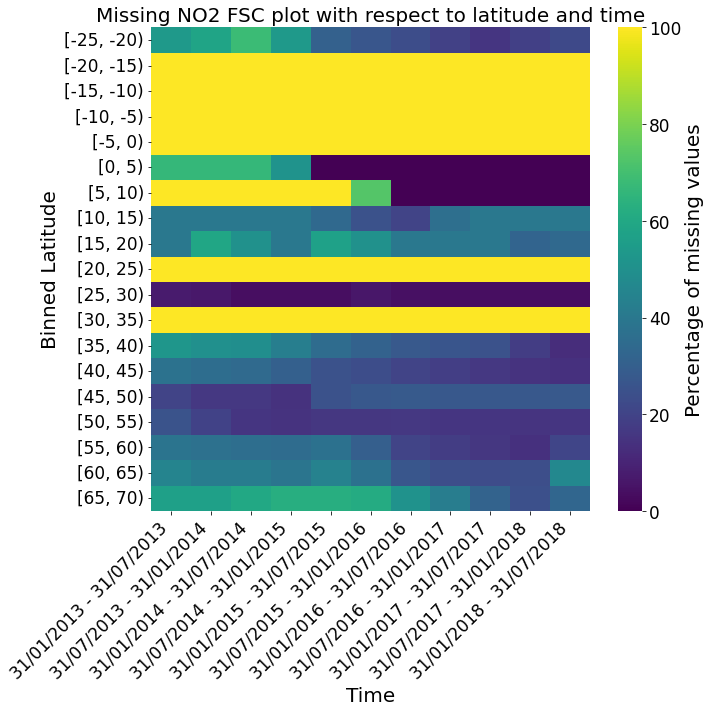

In [520]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_missing_percentage(df):
    return df.isna().sum() / len(df) * 100

# For Latitude
FSC_lat_missing = FSC_lat.drop(columns=['Latitude']).groupby('Latitude_Binned').apply(calculate_missing_percentage).T

# Filter out the 'Stations' column
FSC_lat_missing = FSC_lat_missing.loc[:, FSC_lat_missing.columns != 'Stations']

# Remove non-datetime values from the index
FSC_lat_missing = FSC_lat_missing.drop(index='Stations')

# Filter out 'Latitude_Binned' row before converting index to datetime
FSC_lat_missing = FSC_lat_missing.loc[FSC_lat_missing.index != 'Latitude_Binned']

FSC_lat_missing.index = pd.to_datetime(FSC_lat_missing.index)
FSC_lat_missing = FSC_lat_missing.resample('6M').mean()

FSC_lat_missing_pivot = FSC_lat_missing.reset_index().melt(id_vars='index', var_name='Latitude_Binned', value_name='Missing_Percentage')
FSC_lat_missing_pivot = FSC_lat_missing_pivot.pivot(index='Latitude_Binned', columns='index', values='Missing_Percentage')

# Fill missing values with 100
FSC_lat_missing_pivot_filled = FSC_lat_missing_pivot.fillna(100)

FSC_lat_missing_pivot_filled = FSC_lat_missing_pivot_filled.loc[pd.Interval(-25, -20, closed='left'):pd.Interval(65, 70, closed='left')]

fig, ax = plt.subplots()

sns.heatmap(FSC_lat_missing_pivot_filled, cmap='viridis', ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Binned Latitude')
ax.set_title('Missing NO2 FSC plot with respect to latitude and time')

date_format = '%d/%m/%Y'
xtick_labels = [f"{date.strftime(date_format)} - {(date + pd.DateOffset(months=6)).strftime(date_format)}" for date in FSC_lat_missing.index]
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

ax.tick_params(axis='both', which='major')
ax.collections[0].colorbar.set_label("Percentage of missing values")
plt.tight_layout()

# save figure
plt.savefig('images/Hovmoller_FSC_NO2_missing_latitude.png', dpi=300, facecolor = "white")

plt.show()


C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\4095402172.py:17: FutureWarning: ['Stations'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  FSC_lat_mean = FSC_lat.drop(columns=['Longitude']).groupby('Longitude_Binned').agg(mean_with_min_count).T


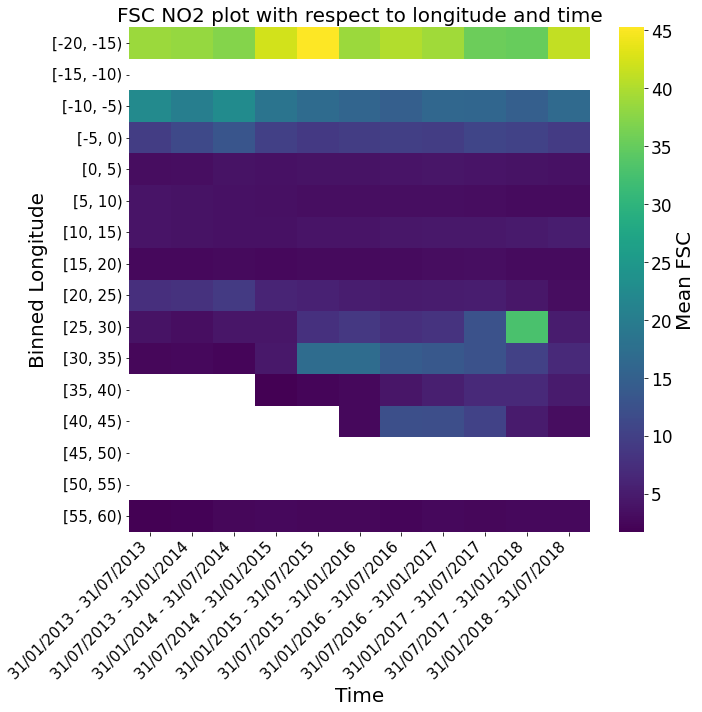

In [523]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Merge FSC and metadata DataFrames
FSC_lat = FSC.T.merge(metadata[['Stations', 'Longitude']], left_index=True, right_on='Stations', how='left')

# Bin latitude data into 5-degree intervals
FSC_lat['Longitude_Binned'] = pd.cut(FSC_lat['Longitude'], np.arange(-90, 91, 5), right=False)

# Compute the mean FSC value for each binned latitude and time
def mean_with_min_count(x):
    return x.mean() if len(x) >= 12 else np.nan

# Drop the 'Latitude' column before transposing the DataFrame
FSC_lat_mean = FSC_lat.drop(columns=['Longitude']).groupby('Longitude_Binned').agg(mean_with_min_count).T

# Bin time data into 6-month intervals
FSC_lat_mean.index = pd.to_datetime(FSC_lat_mean.index)
FSC_lat_mean = FSC_lat_mean.resample('6M').mean()

# Create a pivot table with binned time as columns, binned latitude as index, and mean FSC as values
FSC_lat_pivot = FSC_lat_mean.reset_index().melt(id_vars='index', var_name='Longitude_Binned', value_name='Mean_FSC')
FSC_lat_pivot = FSC_lat_pivot.pivot(index='Longitude_Binned', columns='index', values='Mean_FSC')

# Slice the DataFrame to display the desired latitude range
FSC_lat_pivot = FSC_lat_pivot.loc[pd.Interval(-20, -15, closed='left'):pd.Interval(55, 60, closed='left')]

fig, ax = plt.subplots()

# Plot the Hovmöller diagram using a heatmap
sns.heatmap(FSC_lat_pivot, cmap='viridis', ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Binned Longitude')
ax.set_title('FSC NO2 plot with respect to longitude and time')

# Format the x-axis labels to show the date range
date_format = '%d/%m/%Y'
xtick_labels = [f"{date.strftime(date_format)} - {(date + pd.DateOffset(months=6)).strftime(date_format)}" for date in FSC_lat_mean.index]
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
# add legend to the colorbar
ax.collections[0].colorbar.set_label('Mean FSC')
# save figure
plt.tight_layout()

plt.savefig('images/Hovmoller_FSC_NO2_longitude.png', dpi=300, facecolor = "white")

plt.show()


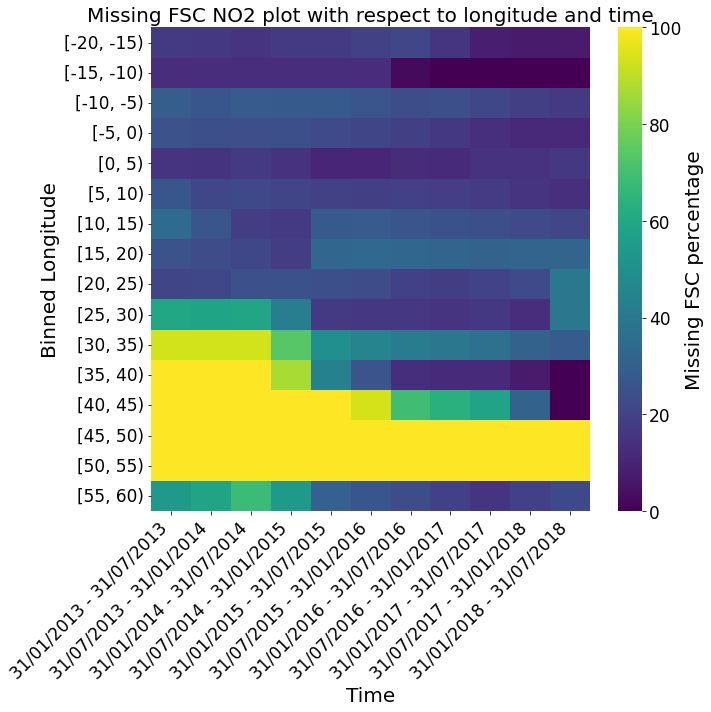

In [791]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

FSC_lon = FSC_lat

def calculate_missing_percentage(df):
    return df.isna().sum() / len(df) * 100

# For Longitude
FSC_lon_missing = FSC_lon.drop(columns=['Longitude']).groupby('Longitude_Binned').apply(calculate_missing_percentage).T

# Filter out the 'Stations' column
FSC_lon_missing = FSC_lon_missing.loc[:, FSC_lon_missing.columns != 'Stations']

# Remove non-datetime values from the index
FSC_lon_missing = FSC_lon_missing.drop(index='Stations')

# Filter out 'Longitude_Binned' row before converting index to datetime
FSC_lon_missing = FSC_lon_missing.loc[FSC_lon_missing.index != 'Longitude_Binned']

FSC_lon_missing.index = pd.to_datetime(FSC_lon_missing.index)
FSC_lon_missing = FSC_lon_missing.resample('6M').mean()

FSC_lon_missing_pivot = FSC_lon_missing.reset_index().melt(id_vars='index', var_name='Longitude_Binned', value_name='Missing_Percentage')
FSC_lon_missing_pivot = FSC_lon_missing_pivot.pivot(index='Longitude_Binned', columns='index', values='Missing_Percentage')

# Fill missing values with 100
FSC_lon_missing_pivot_filled = FSC_lon_missing_pivot.fillna(100)

# Adjust the range of longitude bins as needed
FSC_lon_missing_pivot_filled = FSC_lon_missing_pivot_filled.loc[pd.Interval(-20, -15, closed='left'):pd.Interval(55, 60, closed='left')]

fig, ax = plt.subplots()

sns.heatmap(FSC_lon_missing_pivot_filled, cmap='viridis', ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Binned Longitude')
ax.set_title('Missing FSC NO2 plot with respect to longitude and time')

date_format = '%d/%m/%Y'
xtick_labels = [f"{date.strftime(date_format)} - {(date + pd.DateOffset(months=6)).strftime(date_format)}" for date in FSC_lon_missing.index]
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

ax.tick_params(axis='both', which='major')
ax.collections[0].colorbar.set_label("Missing FSC percentage")

# save figure
plt.tight_layout()

plt.savefig('images/Hovmoller_FSC_NO2_missing_longitude.png', dpi=300, facecolor = "white")

plt.show()


In [792]:
FSC = pd.read_csv("FSC_PM25.csv", index_col = 0)
FSC.index = pd.to_datetime(FSC.index)
metadata = pd.read_csv("metadata_PM25.csv")

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4256\3504554883.py:17: FutureWarning: ['Stations'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  FSC_lat_mean = FSC_lat.drop(columns=['Latitude']).groupby('Latitude_Binned').agg(mean_with_min_count).T


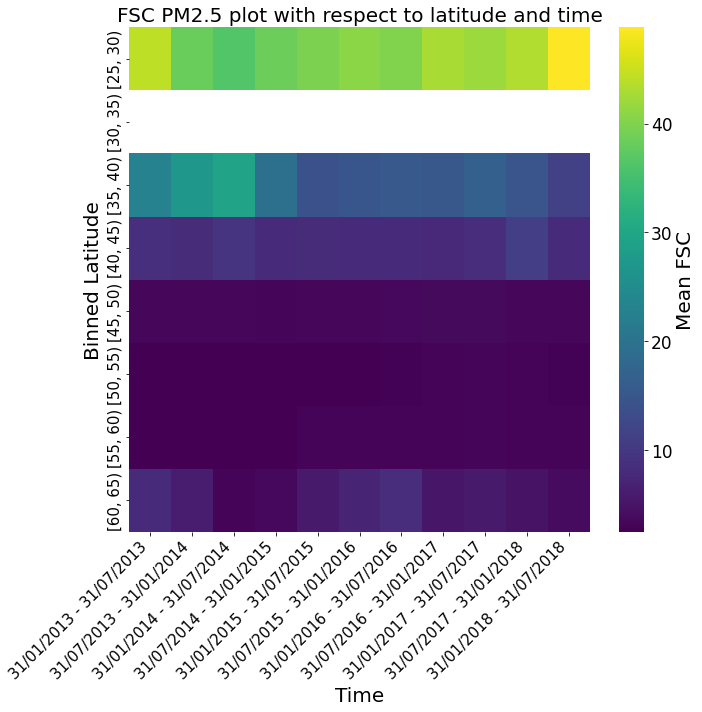

In [525]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Merge FSC and metadata DataFrames
FSC_lat = FSC.T.merge(metadata[['Stations', 'Latitude']], left_index=True, right_on='Stations', how='left')

# Bin latitude data into 5-degree intervals
FSC_lat['Latitude_Binned'] = pd.cut(FSC_lat['Latitude'], np.arange(-90, 91, 5), right=False)

# Compute the mean FSC value for each binned latitude and time
def mean_with_min_count(x):
    return x.mean() if len(x) >= 10 else np.nan

# Drop the 'Latitude' column before transposing the DataFrame
FSC_lat_mean = FSC_lat.drop(columns=['Latitude']).groupby('Latitude_Binned').agg(mean_with_min_count).T

# Bin time data into 6-month intervals
FSC_lat_mean.index = pd.to_datetime(FSC_lat_mean.index)
FSC_lat_mean = FSC_lat_mean.resample('6M').mean()

# Create a pivot table with binned time as columns, binned latitude as index, and mean FSC as values
FSC_lat_pivot = FSC_lat_mean.reset_index().melt(id_vars='index', var_name='Latitude_Binned', value_name='Mean_FSC')
FSC_lat_pivot = FSC_lat_pivot.pivot(index='Latitude_Binned', columns='index', values='Mean_FSC')

# Slice the DataFrame to display the desired latitude range
FSC_lat_pivot = FSC_lat_pivot.loc[pd.Interval(25, 30, closed='left'):pd.Interval(60, 65, closed='left')]

fig, ax = plt.subplots()

# Plot the Hovmöller diagram using a heatmap
sns.heatmap(FSC_lat_pivot, cmap='viridis', ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Binned Latitude')
ax.set_title('FSC PM2.5 plot with respect to latitude and time')

# Format the x-axis labels to show the date range
date_format = '%d/%m/%Y'
xtick_labels = [f"{date.strftime(date_format)} - {(date + pd.DateOffset(months=6)).strftime(date_format)}" for date in FSC_lat_mean.index]
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
# add legend to the colorbar
ax.collections[0].colorbar.set_label('Mean FSC')
# save figure
plt.tight_layout()

plt.savefig('images/Hovmoller_FSC_PM25_latitude.png', dpi=300, facecolor = "white")
plt.show()


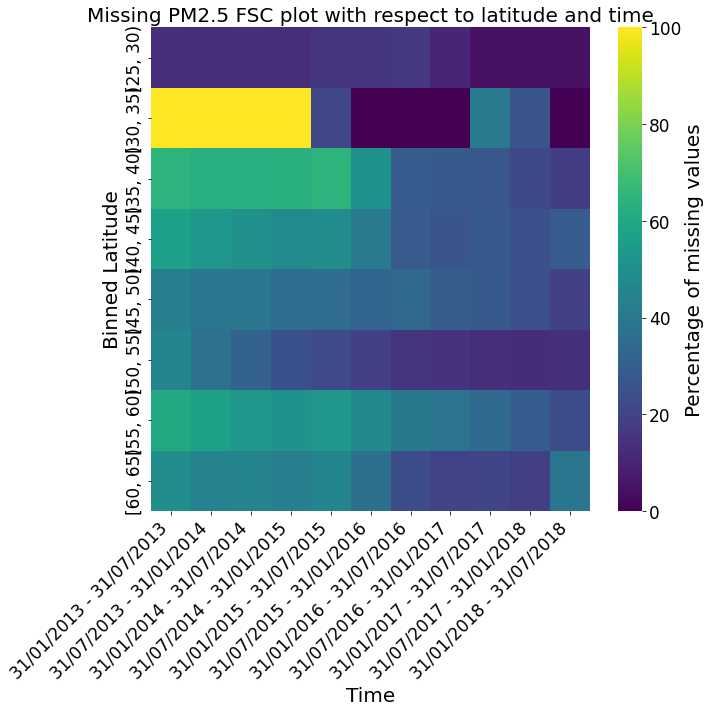

In [794]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_missing_percentage(df):
    return df.isna().sum() / len(df) * 100

# For Latitude
FSC_lat_missing = FSC_lat.drop(columns=['Latitude']).groupby('Latitude_Binned').apply(calculate_missing_percentage).T

# Filter out the 'Stations' column
FSC_lat_missing = FSC_lat_missing.loc[:, FSC_lat_missing.columns != 'Stations']

# Remove non-datetime values from the index
FSC_lat_missing = FSC_lat_missing.drop(index='Stations')

# Filter out 'Latitude_Binned' row before converting index to datetime
FSC_lat_missing = FSC_lat_missing.loc[FSC_lat_missing.index != 'Latitude_Binned']

FSC_lat_missing.index = pd.to_datetime(FSC_lat_missing.index)
FSC_lat_missing = FSC_lat_missing.resample('6M').mean()

FSC_lat_missing_pivot = FSC_lat_missing.reset_index().melt(id_vars='index', var_name='Latitude_Binned', value_name='Missing_Percentage')
FSC_lat_missing_pivot = FSC_lat_missing_pivot.pivot(index='Latitude_Binned', columns='index', values='Missing_Percentage')

# Fill missing values with 100
FSC_lat_missing_pivot_filled = FSC_lat_missing_pivot.fillna(100)

FSC_lat_missing_pivot_filled = FSC_lat_missing_pivot_filled.loc[pd.Interval(25, 30, closed='left'):pd.Interval(60, 65, closed='left')]

fig, ax = plt.subplots()

sns.heatmap(FSC_lat_missing_pivot_filled, cmap='viridis', ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Binned Latitude')
ax.set_title('Missing PM2.5 FSC plot with respect to latitude and time')

date_format = '%d/%m/%Y'
xtick_labels = [f"{date.strftime(date_format)} - {(date + pd.DateOffset(months=6)).strftime(date_format)}" for date in FSC_lat_missing.index]
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

ax.tick_params(axis='both', which='major')
ax.collections[0].colorbar.set_label("Percentage of missing values")

# save figure
plt.tight_layout()

plt.savefig('images/Hovmoller_FSC_PM25_missing_latitude.png', dpi=300, facecolor = "white")

plt.show()


C:\Users\Kelyan\AppData\Local\Temp\ipykernel_1292\2487705644.py:17: FutureWarning: ['Stations'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  FSC_lat_mean = FSC_lat.drop(columns=['Longitude']).groupby('Longitude_Binned').agg(mean_with_min_count).T


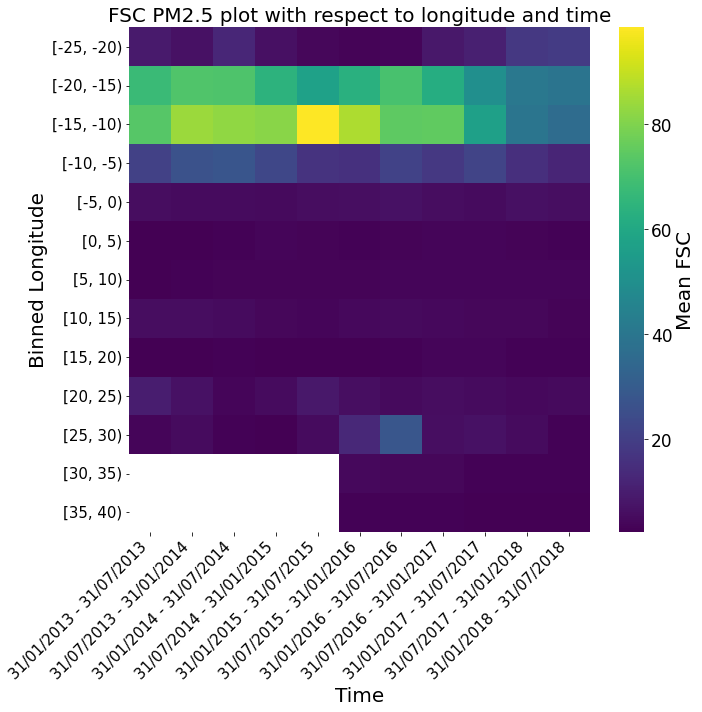

In [795]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Merge FSC and metadata DataFrames
FSC_lat = FSC.T.merge(metadata[['Stations', 'Longitude']], left_index=True, right_on='Stations', how='left')

# Bin latitude data into 5-degree intervals
FSC_lat['Longitude_Binned'] = pd.cut(FSC_lat['Longitude'], np.arange(-90, 91, 5), right=False)

# Compute the mean FSC value for each binned latitude and time
def mean_with_min_count(x):
    return x.mean() if len(x) >= 5 else np.nan

# Drop the 'Latitude' column before transposing the DataFrame
FSC_lat_mean = FSC_lat.drop(columns=['Longitude']).groupby('Longitude_Binned').agg(mean_with_min_count).T

# Bin time data into 6-month intervals
FSC_lat_mean.index = pd.to_datetime(FSC_lat_mean.index)
FSC_lat_mean = FSC_lat_mean.resample('6M').mean()

# Create a pivot table with binned time as columns, binned latitude as index, and mean FSC as values
FSC_lat_pivot = FSC_lat_mean.reset_index().melt(id_vars='index', var_name='Longitude_Binned', value_name='Mean_FSC')
FSC_lat_pivot = FSC_lat_pivot.pivot(index='Longitude_Binned', columns='index', values='Mean_FSC')

# Slice the DataFrame to display the desired latitude range
FSC_lat_pivot = FSC_lat_pivot.loc[pd.Interval(-25, -20, closed='left'):pd.Interval(35, 40, closed='left')]

fig, ax = plt.subplots()

# Plot the Hovmöller diagram using a heatmap
sns.heatmap(FSC_lat_pivot, cmap='viridis', ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Binned Longitude')
ax.set_title('FSC PM2.5 plot with respect to longitude and time')

# Format the x-axis labels to show the date range
date_format = '%d/%m/%Y'
xtick_labels = [f"{date.strftime(date_format)} - {(date + pd.DateOffset(months=6)).strftime(date_format)}" for date in FSC_lat_mean.index]
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
# add legend to the colorbar
ax.collections[0].colorbar.set_label('Mean FSC')
# save figure
plt.tight_layout()

plt.savefig('images/Hovmoller_FSC_PM25_longitude.png', dpi=300, facecolor = "white")

plt.show()


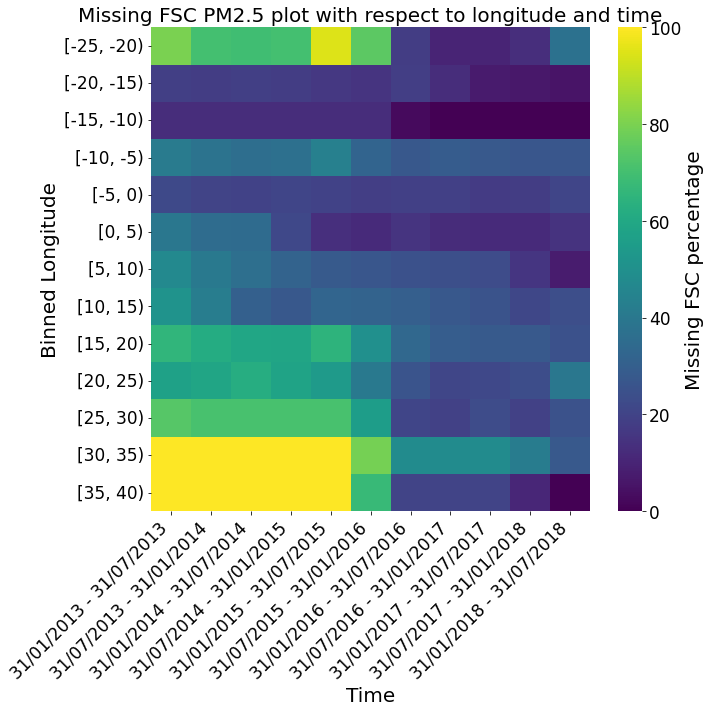

In [786]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

FSC_lon = FSC_lat

def calculate_missing_percentage(df):
    return df.isna().sum() / len(df) * 100

# For Longitude
FSC_lon_missing = FSC_lon.drop(columns=['Longitude']).groupby('Longitude_Binned').apply(calculate_missing_percentage).T

# Filter out the 'Stations' column
FSC_lon_missing = FSC_lon_missing.loc[:, FSC_lon_missing.columns != 'Stations']

# Remove non-datetime values from the index
FSC_lon_missing = FSC_lon_missing.drop(index='Stations')

# Filter out 'Longitude_Binned' row before converting index to datetime
FSC_lon_missing = FSC_lon_missing.loc[FSC_lon_missing.index != 'Longitude_Binned']

FSC_lon_missing.index = pd.to_datetime(FSC_lon_missing.index)
FSC_lon_missing = FSC_lon_missing.resample('6M').mean()

FSC_lon_missing_pivot = FSC_lon_missing.reset_index().melt(id_vars='index', var_name='Longitude_Binned', value_name='Missing_Percentage')
FSC_lon_missing_pivot = FSC_lon_missing_pivot.pivot(index='Longitude_Binned', columns='index', values='Missing_Percentage')

# Fill missing values with 100
FSC_lon_missing_pivot_filled = FSC_lon_missing_pivot.fillna(100)

# Adjust the range of longitude bins as needed
FSC_lon_missing_pivot_filled = FSC_lon_missing_pivot_filled.loc[pd.Interval(-25, -20, closed='left'):pd.Interval(35, 40, closed='left')]

fig, ax = plt.subplots()

sns.heatmap(FSC_lon_missing_pivot_filled, cmap='viridis', ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Binned Longitude')
ax.set_title('Missing FSC PM2.5 plot with respect to longitude and time')

date_format = '%d/%m/%Y'
xtick_labels = [f"{date.strftime(date_format)} - {(date + pd.DateOffset(months=6)).strftime(date_format)}" for date in FSC_lon_missing.index]
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

ax.tick_params(axis='both', which='major')
ax.collections[0].colorbar.set_label("Missing FSC percentage")

plt.tight_layout()

# save figure
plt.savefig('images/Hovmoller_FSC_PM25_missing_longitude.png', dpi=300, facecolor = "white")

plt.show()
